# Fit data over a grid of parameters
1. Load a data-set
2. Find the best-fit
3. Determine $\chi^2$ of a 1D grid of parameters
4. Determine $\chi^2$ over a grid of 2 parameters
5. Plot the contours of $\chi^2$ over that grid, and compare the 1D and 2D confidence regions

In [3]:
import astropy.units as u
import numpy as np
import copy

import pint.config
import pint.gridutils
import pint.models.parameter as param
import pint.residuals
from pint.fitter import WLSFitter
from pint.models.model_builder import get_model, get_model_and_toas
from pint.toa import get_TOAs
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support
import pint.logging

quantity_support()
import scipy.stats

%matplotlib inline

pint.logging.setup(level='WARNING')

1

In [4]:
# Load in a basic dataset
parfile = pint.config.examplefile("NGC6440E.par")
timfile = pint.config.examplefile("NGC6440E.tim")
m, t = get_model_and_toas(parfile, timfile)

f = WLSFitter(t, m)
# find the best-fit
f.fit_toas()
bestfit = f.resids.chi2

WARNING  (pint.toa                      ): CLOCK = UTC(NIST) is not implemented. Using TT(BIPM2021) instead.
WARNING  (pint.toa                      ): Unknown command MODE in line MODE 1



What are the free parameters?

In [5]:
f.model.free_params

['RAJ', 'DECJ', 'F0', 'F1', 'DM']

So we were fitting for RA, Dec, $F0$, $F1$, and $DM$.

We'll do something like 3-sigma around the best-fit value of $F0$, fitting for RA, Dec, $F1$ and $DM$ at each grid point.

## 1D Grid

In [6]:
F0 = np.linspace(
    f.model.F0.quantity - 3 * f.model.F0.uncertainty,
    f.model.F0.quantity + 3 * f.model.F0.uncertainty,
    25,
)

In [7]:
# Do a 1D "grid"  Make sure that the parameters are supplied as tuples with length 1
# the function returns the grid and an extra parameters you want computed.  
# In this case just get the grid with element 0
chi2_F0 = pint.gridutils.grid_chisq(f, ("F0",), (F0,))[0]

  0%|                                                                                                                                                                                               | 0/25 [00:00<?, ?it/s]2022-11-02 10:31:00.605 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554327285 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:00.648 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554322766 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:00.657 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:00.659 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:00.659 | DEBUG    | pint.toa:ap

2022-11-02 10:31:00.817 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655434085 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:00.820 | INFO     | pint.observatory:find_clock_file:938 - Using global clock file for time_gbt.dat with bogus_last_correction=False
2022-11-02 10:31:00.820 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:00.820 | INFO     | pint.observatory:find_clock_file:938 - Using global clock file for time_gbt.dat with bogus_last_correction=False
2022-11-02 10:31:00.820 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:00.829 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:00.829 | DEBUG    | pint.toa:compute_TDBs:2195 - Using

2022-11-02 10:31:01.025 | INFO     | pint.observatory:find_clock_file:938 - Using global clock file for gps2utc.clk with bogus_last_correction=False
2022-11-02 10:31:01.026 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:01.026 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:01.026 | INFO     | pint.observatory:_load_bipm_clock:105 - Loading BIPM clock version bipm2021
2022-11-02 10:31:01.027 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:01.027 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:01.027 | DEBUG    | pint.observatory.clock_file:__init__:797 - Global clock file tai2tt_bipm2021.clk saving kwargs={'bogus_last_correction': False, 'valid_beyond_ends': False}
2022-11-02 10:31:

2022-11-02 10:31:01.250 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:01.311 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:01.340 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:01.349 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:01.395 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:02.005 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:02.039 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:02.050 | DEBUG   

  4%|#######3                                                                                                                                                                               | 1/25 [00:04<01:42,  4.25s/it]2022-11-02 10:31:02.590 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436798 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:02.609 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=61.137251429868286 for F0 = 61.485476554349894 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:02.635 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:02.637 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:02.637

2022-11-02 10:31:02.857 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:02.863 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:02.907 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:02.915 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:02.941 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:02.941 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:02.943 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:02.944 | DEBUG    | pint.models.absol

2022-11-02 10:31:03.262 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:03.268 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:03.268 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:03.268 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:03.268 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655440415 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:03.269 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:03.270 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:03.306 | DEBUG    | pint.models.ab

2022-11-02 10:31:03.534 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:03.557 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:03.558 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:03.559 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:03.559 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:03.560 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:03.560 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:03.561 | DEBUG    | pint.toa:compute_TDBs:

2022-11-02 10:31:03.973 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.57462982724988 for F0 = 61.48547655440867 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 84%|########################################################################################################################################################8                             | 21/25 [00:05<00:00,  8.54it/s]2022-11-02 10:31:03.975 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.63711944165779 for F0 = 61.48547655441319 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:04.014 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:04.014 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel

Text(0, 0.5, '$\\chi^2$')

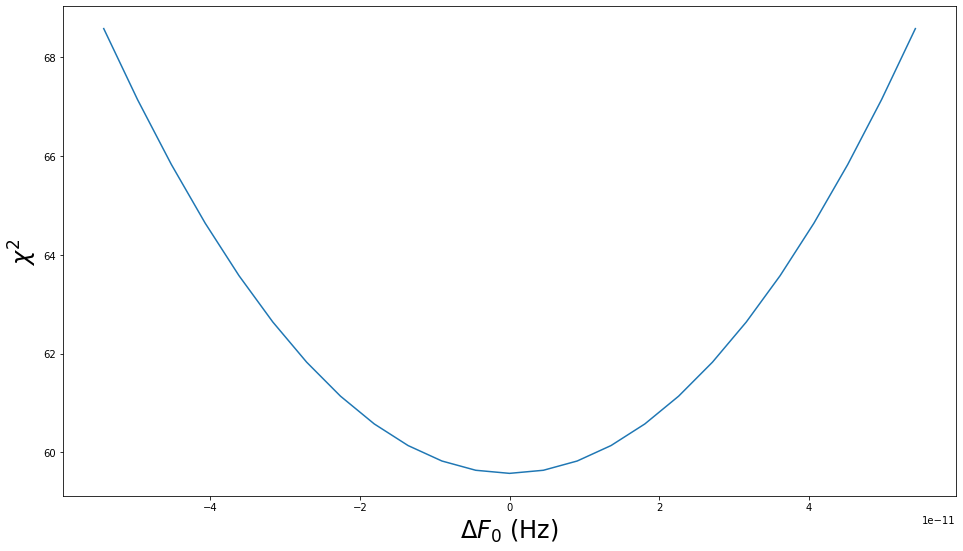

In [8]:
# We can now just do a quick plot to look at the results
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(F0 - f.model.F0.quantity, chi2_F0, label="$\chi^2$ curve")
ax.set_xlabel("$\Delta F_0$ (Hz)", fontsize=24)
ax.set_ylabel("$\chi^2$", fontsize=24)

In [9]:
# We can go a little further.
# For instance, we can find the uncertainty by looking where Delta chi^2=1
F0_delta_chi2 = np.interp(
    1,
    chi2_F0[F0 >= f.model.F0.quantity] - chi2_F0.min(),
    F0[F0 >= f.model.F0.quantity].astype(np.float64),
)

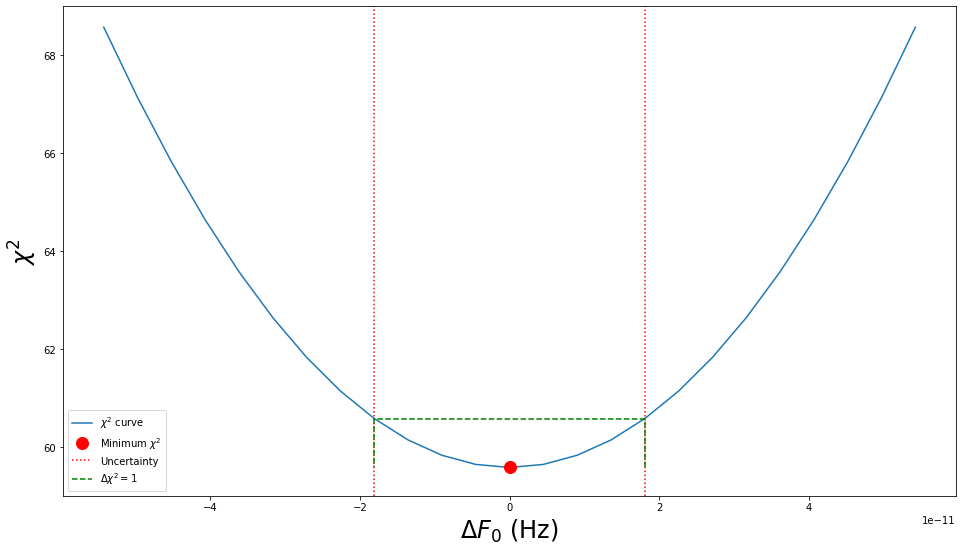

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))
# just plot the values offset from the best-fit values
ax.plot(F0 - f.model.F0.quantity, chi2_F0, label="$\chi^2$ curve")
ax.plot(0, chi2_F0.min(), "ro", markersize=12, label="Minimum $\chi^2$")
ax.plot((f.model.F0.uncertainty) * np.ones(2), [59, 69], "r:", label="Uncertainty")
ax.plot((-f.model.F0.uncertainty) * np.ones(2), [59, 69], "r:")
ax.plot(
    [
        F0_delta_chi2 - f.model.F0.quantity,
        F0_delta_chi2 - f.model.F0.quantity,
        -(F0_delta_chi2 - f.model.F0.quantity),
        -(F0_delta_chi2 - f.model.F0.quantity),
    ],
    [chi2_F0.min(), chi2_F0.min() + 1, chi2_F0.min() + 1, chi2_F0.min()],
    "g--",
    label="$\Delta \chi^2=1$",
)
ax.set_xlabel("$\Delta F_0$ (Hz)", fontsize=24)
ax.set_ylabel("$\chi^2$", fontsize=24)
ax.set_ylim([59, 69])
ax.legend()

From the above you can see that the calculated uncertainties on $F0$ from the model fit agree with where $\Delta \chi^2=1$, which is what we would expect for a single parameter.

## 2D Grid

Now, compute a 2D grid of $\chi^2(F0,F1)$, so we'll also set up a grid of $F1$ to search over

In [11]:
F1 = np.linspace(
    f.model.F1.quantity - 3 * f.model.F1.uncertainty,
    f.model.F1.quantity + 3 * f.model.F1.uncertainty,
    27,
)
chi2grid = pint.gridutils.grid_chisq(f, ("F0", "F1"), (F0, F1))[0]

  0%|                                                                                                                                                                                              | 0/675 [00:00<?, ?it/s]2022-11-02 10:31:11.903 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655431824 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:11.973 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655431824 Hz,F1 = -1.1856572579230818e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:11.998 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655434537 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:12

2022-11-02 10:31:12.323 | INFO     | pint.observatory:find_clock_file:938 - Using global clock file for time_gbt.dat with bogus_last_correction=False
2022-11-02 10:31:12.324 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:12.332 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:12.332 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:12.333 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:12.371 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:12.447 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:12.479 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set sola

2022-11-02 10:31:13.820 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=141.29741870179785 for F0 = 61.485476554322766 Hz,F1 = -1.1856572579230818e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
  0%|5                                                                                                                                                                                     | 2/675 [00:03<18:20,  1.64s/it]2022-11-02 10:31:13.861 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=127.84471653562022 for F0 = 61.485476554331804 Hz,F1 = -1.1856572579230818e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:13.865 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=121.63387026950065 for F0 = 61.48547655433633 Hz,F1 = -1.1856572579230818e-15 Hz / s on b'

2022-11-02 10:31:14.063 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:14.064 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:14.064 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:14.065 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:14.065 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:14.066 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:14.066 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:14.066 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:14.576 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:14.593 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:14.593 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:14.594 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:14.594 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:14.595 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:14.595 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:14.596 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554395106 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8

2022-11-02 10:31:14.861 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:14.861 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:14.862 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:14.863 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:14.863 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:14.864 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:14.864 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:14.865 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:

  3%|####8                                                                                                                                                                                | 18/675 [00:05<01:54,  5.71it/s]2022-11-02 10:31:15.334 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:15.335 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=70.76735239361852 for F0 = 61.485476554399625 Hz,F1 = -1.1856572579230818e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:15.352 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=69.71155475909917 for F0 = 61.48547655440415 Hz,F1 = -1.1856572579230818e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:15.354 | DEBUG   

2022-11-02 10:31:15.577 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655433633 Hz,F1 = -1.1853245223757093e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:15.586 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655434085 Hz,F1 = -1.1853245223757093e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:15.599 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655434537 Hz,F1 = -1.1853245223757093e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:15.614 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:15.6

2022-11-02 10:31:15.980 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:15.982 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:15.983 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:16.001 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:16.003 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:16.004 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:16.004 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:16.005 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:16.

2022-11-02 10:31:16.275 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:16.275 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:16.277 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:16.283 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=110.33494788919573 for F0 = 61.48547655434085 Hz,F1 = -1.1853245223757093e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:16.285 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.4854765543725 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:16.287 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=105.06449143097653 for F0 = 61.48547655434537 Hz,F1

2022-11-02 10:31:16.551 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:16.552 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:16.552 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:16.552 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:16.553 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:16.553 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:16.554 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:16.554 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

  6%|##########1                                                                                                                                                                          | 38/675 [00:07<00:59, 10.70it/s]2022-11-02 10:31:16.978 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:16.979 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:16.979 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:16.980 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:16.980 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:16.980 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock correcti

2022-11-02 10:31:17.217 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:17.238 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:17.238 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:17.240 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554422235 Hz,F1 = -1.1853245223757093e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:17.274 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:17.275 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:17.275 | DEBUG    | pint.toa:apply_clock_corrections:2120 

2022-11-02 10:31:17.643 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:17.645 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:17.645 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:17.646 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:17.646 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:17.646 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:17.647 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:17.647 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:17.868 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:17.872 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:17.878 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.04817518080714 for F0 = 61.485476554422235 Hz,F1 = -1.1853245223757093e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
  7%|#############1                                                                                                                                                                       | 49/675 [00:07<00:50, 12.39it/s]2022-11-02 10:31:17.893 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:17.897 | DEBUG    | pint.toa:compute_posvels:23

2022-11-02 10:31:18.288 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:18.289 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:18.290 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:18.294 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:18.295 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655435441 Hz,F1 = -1.1849917868283368e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:18.297 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:18.297 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gp

2022-11-02 10:31:18.491 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:18.491 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:18.492 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:18.499 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:18.500 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:18.500 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:18.501 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:18.501 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:1

  9%|###############8                                                                                                                                                                     | 59/675 [00:08<01:00, 10.27it/s]2022-11-02 10:31:18.906 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=87.18840909998467 for F0 = 61.48547655435893 Hz,F1 = -1.1849917868283368e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:18.910 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438606 Hz,F1 = -1.1849917868283368e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:18.925 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655439059 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-80

2022-11-02 10:31:19.168 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:19.171 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:19.171 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:19.172 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:19.173 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:19.174 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:19.175 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:19.175 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:19.518 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:19.522 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:19.568 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:19.569 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:19.570 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:19.644 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:19.648 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:19.650 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=70.4870698157

2022-11-02 10:31:19.953 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.02020509111766 for F0 = 61.48547655440867 Hz,F1 = -1.1849917868283368e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:19.956 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.22623784974773 for F0 = 61.48547655440415 Hz,F1 = -1.1849917868283368e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 10%|##################7                                                                                                                                                                  | 70/675 [00:10<01:00,  9.95it/s]2022-11-02 10:31:19.977 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:19.978 | DEBU

2022-11-02 10:31:20.206 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:20.212 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:20.219 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:20.224 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:20.243 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:20.243 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:20.244 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:20.312 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.4641226706

2022-11-02 10:31:20.629 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655435441 Hz,F1 = -1.1846590512809643e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:20.640 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655435893 Hz,F1 = -1.1846590512809643e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:20.650 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=116.70505560039685 for F0 = 61.485476554327285 Hz,F1 = -1.1846590512809643e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:20.657 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=110.9096839441742 for F0 = 61.485476554331804 Hz,F1 = -1.1

2022-11-02 10:31:20.886 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:20.887 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:20.887 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:20.910 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:20.914 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:20.914 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:20.918 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:20.952 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=95.5855886434

2022-11-02 10:31:21.304 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:21.310 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655439059 Hz,F1 = -1.1846590512809643e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:21.311 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:21.316 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=79.96483329053844 for F0 = 61.48547655436346 Hz,F1 = -1.1846590512809643e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 13%|#######################                                                                                                                      

2022-11-02 10:31:21.526 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:21.526 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:21.527 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:21.579 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=69.84280116312549 for F0 = 61.48547655438154 Hz,F1 = -1.1846590512809643e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 13%|########################1                                                                                                                                                            | 90/675 [00:11<00:44, 13.03it/s]2022-11-02 10:31:21.581 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris t

2022-11-02 10:31:21.954 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655442676 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:21.958 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655431824 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:21.969 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:21.970 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:21.970 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:21.981 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.21947911533921 for F0 = 61.485476554399625 Hz,F1 = -1.1846590512809643e-

2022-11-02 10:31:22.217 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.09487975950819 for F0 = 61.485476554417716 Hz,F1 = -1.1846590512809643e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:22.228 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:22.229 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:22.230 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:22.231 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:22.231 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:22.232 | INFO     | 

2022-11-02 10:31:22.523 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:22.523 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:22.525 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:22.540 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:22.540 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:22.540 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:22.540 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:22.550 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:22.583 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11

2022-11-02 10:31:22.821 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655435893 Hz,F1 = -1.1843263157335917e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:22.822 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:22.822 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:22.825 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436798 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:22.835 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.4854765543725 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:22

2022-11-02 10:31:23.059 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=91.28538295337432 for F0 = 61.48547655434537 Hz,F1 = -1.1843263157335917e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:23.093 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:23.097 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:23.110 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:23.114 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:23.114 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438154 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 

2022-11-02 10:31:23.508 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:23.515 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655440415 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:23.528 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655440867 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:23.531 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554395106 Hz,F1 = -1.1843263157335917e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:23.539 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554399625 Hz,F1 = 

2022-11-02 10:31:23.709 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:23.713 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:23.724 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:23.729 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:23.743 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.56697775973434 for F0 = 61.48547655438154 Hz,F1 = -1.1843263157335917e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:23.798 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554417716 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version

 17%|###############################4                                                                                                                                                    | 118/675 [00:14<00:53, 10.35it/s]2022-11-02 10:31:24.134 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.912245030651 for F0 = 61.48547655440415 Hz,F1 = -1.1843263157335917e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:24.146 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.95585258511355 for F0 = 61.485476554399625 Hz,F1 = -1.1843263157335917e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:24.158 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655442676 Hz,F1 = -1.1843263157335917e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kern

2022-11-02 10:31:24.344 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:24.344 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:24.345 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:24.349 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:24.350 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:24.376 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:24.377 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:24.378 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:24.378 | INFO     | pint.observatory:gps_correc

2022-11-02 10:31:24.839 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:24.839 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:24.839 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=117.98265502337685 for F0 = 61.48547655431824 Hz,F1 = -1.1839935801862192e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:24.840 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:24.843 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554349894 Hz,F1 = -1.1839935801862192e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:24.874 | DEBUG    | pint.models.absolute

2022-11-02 10:31:25.043 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.4854765543725 Hz,F1 = -1.1839935801862192e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:25.052 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:25.054 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:25.054 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:25.054 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:25.055 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:25.055 | INFO     | pint.observatory.topo_obs:c

2022-11-02 10:31:25.335 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:25.349 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:25.362 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:25.362 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:25.363 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:25.363 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:25.372 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:25.374 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:25.4

2022-11-02 10:31:25.703 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=73.68163797800631 for F0 = 61.48547655436346 Hz,F1 = -1.1839935801862192e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:25.711 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=71.14172310914923 for F0 = 61.48547655436798 Hz,F1 = -1.1839935801862192e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 20%|####################################2                                                                                                                                               | 136/675 [00:15<00:50, 10.70it/s]2022-11-02 10:31:25.725 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.94547487352926 for F0 = 61.4854765543725 Hz,F1 = -1.1839935801862192e-15 Hz / s on b'Darwin

2022-11-02 10:31:25.893 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:25.899 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:25.908 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:25.909 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:25.910 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:25.910 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:25.911 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:25.911 | INFO     | pint.observatory.topo_ob

2022-11-02 10:31:26.412 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655442676 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:26.419 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655431824 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:26.445 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.194495281491 for F0 = 61.48547655440415 Hz,F1 = -1.1839935801862192e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:26.451 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.747606037952224 for F0 = 61.48547655440867 Hz,F1 = -1.1839935801862192e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21

2022-11-02 10:31:26.649 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:26.651 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:26.651 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:26.652 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:26.653 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:26.657 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:26.658 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:26.658 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:27.082 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:27.083 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:27.083 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:27.084 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:27.084 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:27.085 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:27.085 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:27.086 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:27.281 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:27.281 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:27.282 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:27.282 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:27.283 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:27.284 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:27.284 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:27.286 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:

2022-11-02 10:31:27.500 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:27.512 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:27.512 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:27.548 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:27.548 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:27.571 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:27.571 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:27.572 | DEBUG    | pint.models.absolute_phase:get_TZR_to

2022-11-02 10:31:27.899 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:27.901 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:27.906 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:27.919 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:27.919 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438606 Hz,F1 = -1.1836608446388467e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:27.919 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:27.920 | DEBUG    | pint.models.absolute_phas

2022-11-02 10:31:28.171 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:28.171 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:28.171 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:28.172 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:28.172 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:28.173 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:28.173 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:28.175 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:

 25%|############################################2                                                                                                                                       | 166/675 [00:18<00:46, 11.00it/s]2022-11-02 10:31:28.582 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554422235 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:28.587 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655442676 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:28.596 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:28.597 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:28.597 | DEBUG    |

2022-11-02 10:31:28.868 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:28.870 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:28.870 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:28.870 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:28.871 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:28.871 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:28.872 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:28.872 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:29.240 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=70.23706808406881 for F0 = 61.48547655442676 Hz,F1 = -1.1836608446388467e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:29.243 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.05623071231722 for F0 = 61.485476554422235 Hz,F1 = -1.1836608446388467e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 26%|##############################################4                                                                                                                                     | 174/675 [00:19<00:45, 11.04it/s]2022-11-02 10:31:29.290 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:29.290 | INFO    

2022-11-02 10:31:29.551 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436346 Hz,F1 = -1.1833281090914742e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:29.552 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436798 Hz,F1 = -1.1833281090914742e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:29.563 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:29.564 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:29.564 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:29.565 | INFO     | pint.observato

2022-11-02 10:31:29.864 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:29.864 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:29.934 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=80.14175342217015 for F0 = 61.48547655434537 Hz,F1 = -1.1833281090914742e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 27%|################################################5                                                                                                                                   | 182/675 [00:19<00:45, 10.93it/s]2022-11-02 10:31:29.936 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=76.7332534018668 for F0 = 61.485476554349894 Hz,F1 = -1.1833281090914742e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEA

2022-11-02 10:31:30.251 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:30.252 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:30.252 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:30.253 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:30.253 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:30.253 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:30.254 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:30.254 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:30.484 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:30.488 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:30.493 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:30.497 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:30.501 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:30.600 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:30.601 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:30.602 | DEBUG    | pint.models.absolute_pha

2022-11-02 10:31:30.877 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554327285 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:30.891 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655442676 Hz,F1 = -1.1833281090914742e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:30.895 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:30.896 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655431824 Hz,F1 = -1.1829953735441015e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:30.899 | INFO     | pint.solar_system_epheme

2022-11-02 10:31:31.088 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:31.093 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:31.113 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:31.115 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:31.115 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:31.115 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:31.116 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:31.116 | INFO     | pint.observatory.topo_obs:clock

 30%|#####################################################6                                                                                                                              | 201/675 [00:21<00:37, 12.63it/s]2022-11-02 10:31:31.480 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=93.07137734632451 for F0 = 61.485476554327285 Hz,F1 = -1.1829953735441015e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:31.488 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655434085 Hz,F1 = -1.1829953735441015e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:31.493 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=97.94518141865566 for F0 = 61.485476554322766 Hz,F1 = -1.1829953735441015e-15 Hz / s on b'Darwin plock 21.6.0 Darwin K

 30%|######################################################4                                                                                                                             | 204/675 [00:21<00:34, 13.65it/s]2022-11-02 10:31:31.654 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:31.655 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:31.656 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:31.656 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:31.657 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:31.657 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock correcti

2022-11-02 10:31:32.076 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=80.51199079870676 for F0 = 61.48547655434085 Hz,F1 = -1.1829953735441015e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:32.079 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=77.0128720071002 for F0 = 61.48547655434537 Hz,F1 = -1.1829953735441015e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 31%|######################################################9                                                                                                                             | 206/675 [00:22<00:50,  9.36it/s]2022-11-02 10:31:32.098 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:32.098 | INFO     |

2022-11-02 10:31:32.285 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554395106 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:32.304 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554399625 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:32.311 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.6723063290202 for F0 = 61.48547655436798 Hz,F1 = -1.1829953735441015e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 31%|########################################################5                                                                                                                           | 212/675 [00:22<00:32, 14.

2022-11-02 10:31:32.480 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:32.486 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:32.488 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:32.490 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:32.492 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:32.598 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:32.605 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:32.608 | INFO     | pint.solar_system

2022-11-02 10:31:33.022 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=62.7982313850404 for F0 = 61.48547655440415 Hz,F1 = -1.1829953735441015e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:33.025 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.11048698041323 for F0 = 61.48547655440867 Hz,F1 = -1.1829953735441015e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 33%|##########################################################6                                                                                                                         | 220/675 [00:23<00:31, 14.40it/s]2022-11-02 10:31:33.055 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554422235 Hz,F1 = -1.1829953735441015e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Ker

2022-11-02 10:31:33.323 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:33.332 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:33.332 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:33.339 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:33.351 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:33.370 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:33.381 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:33.381 | DEBUG    | pint

 33%|############################################################                                                                                                                        | 225/675 [00:23<00:41, 10.87it/s]2022-11-02 10:31:33.641 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:33.650 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:33.651 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:33.651 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:33.652 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:33.652 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27

2022-11-02 10:31:34.067 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:34.071 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:34.076 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:34.080 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:34.102 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:34.103 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:34.104 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:34.107 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set 

 34%|#############################################################8                                                                                                                      | 232/675 [00:24<00:44, 10.06it/s]2022-11-02 10:31:34.415 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.71568234337818 for F0 = 61.48547655435441 Hz,F1 = -1.182662637996729e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:34.435 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.50061802548721 for F0 = 61.48547655435893 Hz,F1 = -1.182662637996729e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:34.450 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438154 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:0

2022-11-02 10:31:34.617 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:34.618 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:34.618 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:34.619 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:34.619 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:34.619 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:34.620 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:34.620 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

 36%|################################################################                                                                                                                    | 240/675 [00:25<00:40, 10.61it/s]2022-11-02 10:31:35.110 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.42729305975084 for F0 = 61.48547655438606 Hz,F1 = -1.182662637996729e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:35.122 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.61791703802387 for F0 = 61.48547655439059 Hz,F1 = -1.182662637996729e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:35.131 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=61.15221045814466 for F0 = 61.485476554395106 Hz,F1 = -1.182662637996729e-15 Hz / s on b'Darwin 

2022-11-02 10:31:35.461 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:35.461 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:35.480 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:35.480 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:35.481 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:35.481 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:35.504 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:35.510 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11

2022-11-02 10:31:35.778 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:35.779 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:35.779 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:35.795 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.97872337417215 for F0 = 61.485476554417716 Hz,F1 = -1.182662637996729e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 37%|##################################################################1                                                                                                                 | 248/675 [00:25<00:39, 10.92it/s]2022-11-02 10:31:35.818 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=71.57503623978732 for F0 = 61.4854765

2022-11-02 10:31:36.153 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:36.160 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:36.175 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:36.175 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:36.176 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:36.176 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:36.213 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:36.218 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11

 38%|####################################################################2                                                                                                               | 256/675 [00:26<00:38, 10.75it/s]2022-11-02 10:31:36.532 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=71.63360316884174 for F0 = 61.48547655434537 Hz,F1 = -1.1823299024493566e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:36.577 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.98424723342953 for F0 = 61.485476554349894 Hz,F1 = -1.1823299024493566e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:36.586 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.71654135894427 for F0 = 61.48547655435893 Hz,F1 = -1.1823299024493566e-15 Hz / s on b'Darw

2022-11-02 10:31:36.787 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:36.788 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:36.789 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:36.789 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:36.789 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:36.790 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:36.791 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:36.791 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:37.195 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:37.196 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:37.196 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:37.204 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:37.206 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:37.206 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:37.215 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:37.217 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:37.

2022-11-02 10:31:37.451 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:37.453 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:37.454 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:37.455 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:37.455 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:37.456 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:37.456 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:37.457 | DEBUG    | pint.toa:compute_TDBs:2170 -

2022-11-02 10:31:37.683 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:37.698 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:37.703 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:37.715 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:37.719 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:37.861 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:37.879 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:37.879 | INFO     | pint

2022-11-02 10:31:38.205 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:38.209 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:38.210 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:38.211 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:38.211 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:38.211 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:38.212 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:38.212 | DEBUG    | pint.toa:_

2022-11-02 10:31:38.409 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:38.411 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:38.436 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:38.436 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:38.436 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:38.442 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:38.442 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:38.442 | DEBUG    | pint.toa:co

 42%|############################################################################2                                                                                                       | 286/675 [00:28<00:28, 13.44it/s]2022-11-02 10:31:38.930 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554395106 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:38.942 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.83837089079388 for F0 = 61.48547655436798 Hz,F1 = -1.1819971669019839e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:38.957 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.4854765543725 Hz,F1 = -1.1819971669019839e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-80

2022-11-02 10:31:39.115 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:39.116 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:39.116 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:39.116 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:39.117 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:39.117 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:39.117 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:39.117 | INFO     | pint.observatory:bipm_correction:224 - Applyin

 43%|############################################################################8                                                                                                       | 288/675 [00:29<00:47,  8.23it/s]2022-11-02 10:31:39.653 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=61.925659985322795 for F0 = 61.485476554395106 Hz,F1 = -1.1819971669019839e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:39.667 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.18855020461359 for F0 = 61.48547655438606 Hz,F1 = -1.1819971669019839e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:39.685 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.0374489160192 for F0 = 61.48547655440415 Hz,F1 = -1.1819971669019839e-15 Hz / s on b'Darw

2022-11-02 10:31:39.857 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554322766 Hz,F1 = -1.1816644313546114e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:39.874 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:39.876 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:39.876 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:39.877 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:39.877 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:39.878 | INFO     | pint.observatory.topo_obs

2022-11-02 10:31:40.276 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:40.277 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:40.278 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:40.341 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:40.356 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:40.360 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:40.360 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:40.361 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:40.

2022-11-02 10:31:40.682 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:40.682 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:40.683 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:40.683 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:40.683 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:40.684 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:40.685 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:40.686 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554349894 Hz,F1 = -1.1816644313546114e-15 Hz / s 

2022-11-02 10:31:40.861 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:40.867 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:40.902 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:40.932 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:40.936 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:40.944 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:40.949 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:40.957 | DEBUG    | pint

2022-11-02 10:31:41.360 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655437702 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:41.375 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438154 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:41.387 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438606 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:41.399 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655439059 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:41.400 | DEBUG 

2022-11-02 10:31:41.620 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:41.652 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:41.667 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:41.674 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:41.689 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:41.696 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:41.717 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:41.719 | INFO     | pint

 47%|####################################################################################2                                                                                               | 316/675 [00:32<00:31, 11.31it/s]2022-11-02 10:31:42.158 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554422235 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:42.172 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655440415 Hz,F1 = -1.1816644313546114e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:42.185 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655440867 Hz,F1 = -1.1816644313546114e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM6

2022-11-02 10:31:42.330 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:42.330 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:42.330 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:42.330 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:42.331 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:42.331 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:42.332 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:42.332 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:

2022-11-02 10:31:42.878 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=81.42844843894927 for F0 = 61.48547655442676 Hz,F1 = -1.1816644313546114e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 48%|######################################################################################6                                                                                             | 325/675 [00:32<00:27, 12.67it/s]2022-11-02 10:31:42.890 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554331804 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:42.901 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=84.3192720258709 for F0 = 61.48547655431824 Hz,F1 = -1.1813316958072389e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20

2022-11-02 10:31:43.081 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:43.082 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:43.082 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:43.083 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:43.083 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:43.084 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:43.084 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:43.084 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:43.638 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.4854765543725 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:43.642 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:43.644 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:43.646 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:43.652 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436346 Hz,F1 = -1.1813316958072389e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:43.668 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655437702 Hz on b'Darwin plock

2022-11-02 10:31:43.849 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655439059 Hz,F1 = -1.1813316958072389e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:43.865 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554395106 Hz,F1 = -1.1813316958072389e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:43.873 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:43.874 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:43.874 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:43.875 | INFO     | pint.observat

 50%|#########################################################################################6                                                                                          | 336/675 [00:34<00:35,  9.43it/s]2022-11-02 10:31:44.264 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=59.74656817765726 for F0 = 61.48547655436798 Hz,F1 = -1.1813316958072389e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:44.278 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=59.574703513516056 for F0 = 61.4854765543725 Hz,F1 = -1.1813316958072389e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:44.324 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=59.74651037519907 for F0 = 61.48547655437702 Hz,F1 = -1.1813316958072389e-15 Hz / s on b'Darwi

2022-11-02 10:31:44.526 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:44.526 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:44.528 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:44.529 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:44.529 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:44.531 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:44.557 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554422235 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:44.563

2022-11-02 10:31:44.937 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:44.937 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:44.958 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:44.958 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:44.959 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:44.959 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:44.963 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:44.964 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:44.

 52%|#############################################################################################                                                                                       | 349/675 [00:35<00:31, 10.44it/s]2022-11-02 10:31:45.313 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:45.322 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:45.325 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:45.326 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:45.327 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:45.327 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~fe

2022-11-02 10:31:45.532 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:45.537 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:45.556 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:45.556 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:45.558 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:45.562 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:45.562 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:45.563 | DEBUG    | pint

2022-11-02 10:31:46.018 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436346 Hz,F1 = -1.1809989602598664e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:46.028 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:46.029 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:46.029 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:46.030 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:46.030 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:46.031 | INFO     | pint.observatory.topo_obs:

2022-11-02 10:31:46.167 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438154 Hz,F1 = -1.1809989602598664e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:46.172 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655439059 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:46.175 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438606 Hz,F1 = -1.1809989602598664e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:46.204 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655439059 Hz,F1 = -1.1809989602598664e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug

 53%|################################################################################################                                                                                    | 360/675 [00:36<00:33,  9.43it/s]2022-11-02 10:31:46.557 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:46.558 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:46.558 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:46.590 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=59.90239742190856 for F0 = 61.48547655436346 Hz,F1 = -1.1809989602598664e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:46.598 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=59.63991400272841 for F0 = 61.4854765

 54%|#################################################################################################3                                                                                  | 365/675 [00:36<00:26, 11.78it/s]2022-11-02 10:31:46.806 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.48253356491842 for F0 = 61.48547655439059 Hz,F1 = -1.1809989602598664e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:46.816 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=62.02667129288068 for F0 = 61.48547655438606 Hz,F1 = -1.1809989602598664e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:46.832 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:46.833 | DEBU

2022-11-02 10:31:47.158 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:47.158 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:47.171 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:47.171 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:47.173 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:47.173 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:47.174 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:47.175 | DEBUG    | pint.models.absol

2022-11-02 10:31:47.496 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=79.43478130676849 for F0 = 61.485476554417716 Hz,F1 = -1.1809989602598664e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 55%|###################################################################################################4                                                                                | 373/675 [00:37<00:23, 12.70it/s]2022-11-02 10:31:47.508 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=83.2963333749188 for F0 = 61.485476554422235 Hz,F1 = -1.1809989602598664e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:47.520 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:47.522 | DEB

2022-11-02 10:31:47.746 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:47.751 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:47.808 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:47.821 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:47.823 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:47.836 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:47.836 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:47.836 | DEBUG    | pint

2022-11-02 10:31:48.172 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=69.52434257719854 for F0 = 61.485476554331804 Hz,F1 = -1.1806662247124937e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:48.207 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.03775999827508 for F0 = 61.48547655434085 Hz,F1 = -1.1806662247124937e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:48.220 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655435893 Hz,F1 = -1.1806662247124937e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:48.228 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436346 Hz on b'Darwin

2022-11-02 10:31:48.382 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438154 Hz,F1 = -1.1806662247124937e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:48.383 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438606 Hz,F1 = -1.1806662247124937e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:48.396 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:48.397 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:48.397 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:48.398 | INFO     | pint.observato

 57%|######################################################################################################6                                                                             | 385/675 [00:38<00:31,  9.21it/s]2022-11-02 10:31:48.858 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:48.860 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:48.861 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:48.864 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:48.866 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:48.867 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:48.918 | DEBUG    | pint.models.absolute_pha

2022-11-02 10:31:49.242 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:49.242 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655441319 Hz,F1 = -1.1806662247124937e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:49.253 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554417716 Hz,F1 = -1.1806662247124937e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:49.266 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554422235 Hz,F1 = -1.1806662247124937e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:49.285 | DEBUG    | 

2022-11-02 10:31:49.620 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:49.621 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:49.621 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:49.622 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:49.623 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:49.623 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:49.624 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:49.624 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:50.034 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554327285 Hz,F1 = -1.1803334891651212e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:50.050 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554331804 Hz,F1 = -1.1803334891651212e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:50.062 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655433633 Hz,F1 = -1.1803334891651212e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:50.071 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:50

 59%|##########################################################################################################6                                                                         | 400/675 [00:40<00:24, 11.16it/s]2022-11-02 10:31:50.241 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554349894 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:50.275 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554349894 Hz,F1 = -1.1803334891651212e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:50.293 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:50.309 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single T

2022-11-02 10:31:50.755 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.81688747599853 for F0 = 61.48547655433633 Hz,F1 = -1.1803334891651212e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:50.772 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:50.776 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:50.777 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:50.778 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:50.777 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=62.52374248415719 for F0 = 61.48547655434537 Hz,F1 = -1.1803334891651212e-15 Hz / s

2022-11-02 10:31:51.100 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:51.101 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:51.101 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:51.102 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:51.103 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:51.103 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:51.104 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:51.104 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:51.568 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:51.570 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:51.571 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:51.597 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554395106 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:51.606 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554399625 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:51.613 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.09794679936645 for F0 = 61.48547655438154 Hz,F1 = -1.1803334891651212e

2022-11-02 10:31:51.862 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:51.863 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:51.863 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:51.864 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:51.864 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:51.865 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:51.865 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:51.865 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

 62%|###############################################################################################################7                                                                    | 419/675 [00:42<00:28,  8.94it/s]2022-11-02 10:31:52.341 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=77.96273646571093 for F0 = 61.48547655440867 Hz,F1 = -1.1803334891651212e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:52.349 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655431824 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:52.357 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=81.64304571739605 for F0 = 61.48547655441319 Hz,F1 = -1.1803334891651212e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20

2022-11-02 10:31:52.543 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:52.543 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:52.544 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:52.545 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:52.547 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:52.547 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:52.548 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:52.548 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:5

2022-11-02 10:31:53.081 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:53.081 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:53.082 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:53.082 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
 63%|#################################################################################################################8                                                                  | 427/675 [00:43<00:28,  8.77it/s]2022-11-02 10:31:53.083 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:53.085 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:53.104 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655435441 Hz on b'Darwin plock

2022-11-02 10:31:53.330 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655437702 Hz,F1 = -1.1800007536177488e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:53.338 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438154 Hz,F1 = -1.1800007536177488e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:53.340 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:53.341 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:53.341 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:53.342 | INFO     | pint.observato

2022-11-02 10:31:53.569 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:53.571 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:53.585 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:53.591 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:53.591 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:53.607 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:53.627 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:53.627 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43

 65%|#####################################################################################################################                                                               | 439/675 [00:44<00:21, 11.08it/s]2022-11-02 10:31:54.083 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655440415 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:54.095 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:54.099 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:54.100 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:54.102 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:3

2022-11-02 10:31:54.358 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:54.359 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:54.360 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:54.360 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:54.361 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:54.361 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:54.361 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:54.362 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

 66%|######################################################################################################################6                                                             | 445/675 [00:44<00:25,  9.16it/s]2022-11-02 10:31:54.817 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:54.817 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:54.822 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:54.867 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:54.869 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:54.869 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:54.870 | INFO     | pint.observatory:gps_correct

2022-11-02 10:31:55.102 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655434537 Hz,F1 = -1.179668018070376e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:55.107 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:55.112 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:55.113 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:55.114 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:55.114 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:55.115 | DEBUG    | pint.toa:__init

2022-11-02 10:31:55.520 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554349894 Hz,F1 = -1.179668018070376e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:55.522 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:55.522 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:55.522 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:55.528 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655435441 Hz,F1 = -1.179668018070376e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:55.548 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61

 68%|#########################################################################################################################6                                                          | 456/675 [00:45<00:17, 12.43it/s]2022-11-02 10:31:55.724 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436346 Hz,F1 = -1.179668018070376e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:55.736 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436798 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:55.755 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.4854765543725 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:55.7

2022-11-02 10:31:55.991 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:55.999 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:56.026 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:56.032 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:56.050 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:56.050 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:56.051 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:56.051 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11

 68%|##########################################################################################################################9                                                         | 461/675 [00:46<00:20, 10.61it/s]2022-11-02 10:31:56.379 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.23498245623941 for F0 = 61.4854765543725 Hz,F1 = -1.179668018070376e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:56.387 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554399625 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:56.392 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.45274239086437 for F0 = 61.48547655438154 Hz,F1 = -1.179668018070376e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:0

2022-11-02 10:31:56.721 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:56.721 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:56.722 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:56.723 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:56.723 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:56.725 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:56.725 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:56.730 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11

 69%|#############################################################################################################################                                                       | 469/675 [00:47<00:18, 10.86it/s]2022-11-02 10:31:57.073 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=80.5113711618045 for F0 = 61.48547655440415 Hz,F1 = -1.179668018070376e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:57.082 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=84.35410616655093 for F0 = 61.48547655440867 Hz,F1 = -1.179668018070376e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:57.089 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554322766 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:0

2022-11-02 10:31:57.391 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:57.392 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:57.395 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:57.395 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:57.415 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:57.415 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:57.415 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:57.416 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 

2022-11-02 10:31:57.796 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:57.797 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:57.797 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.09982189655355 for F0 = 61.485476554331804 Hz,F1 = -1.1793352825230036e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:57.799 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:57.799 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:57.800 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:57.800 | DEBUG  

2022-11-02 10:31:57.991 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:57.992 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:57.992 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:57.993 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:57.993 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:57.994 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:57.994 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:57.994 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:31:58.458 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655439059 Hz,F1 = -1.1793352825230036e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:58.500 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:58.501 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=61.83726504528974 for F0 = 61.48547655435893 Hz,F1 = -1.1793352825230036e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:31:58.502 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:31:58.502 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:31:58.503 | 

2022-11-02 10:31:58.725 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:58.729 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:58.731 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:58.735 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:31:58.794 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:58.795 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:58.796 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:58.863 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.5693880883

2022-11-02 10:31:59.127 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:31:59.128 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:31:59.128 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:31:59.129 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:31:59.129 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:31:59.131 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:31:59.134 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:31:59.135 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris 

2022-11-02 10:31:59.433 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:31:59.453 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:59.454 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:59.510 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=97.21161386077017 for F0 = 61.485476554417716 Hz,F1 = -1.1793352825230036e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 74%|####################################################################################################################################7                                               | 498/675 [00:49<00:14, 12.15it/s]2022-11-02 10:31:59.560 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655434085 Hz on b'Darwin p

2022-11-02 10:31:59.836 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:59.836 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:59.836 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:59.836 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:31:59.837 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:59.837 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:59.837 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:59.837 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:31:59.844 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to 

2022-11-02 10:32:00.154 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:32:00.156 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:00.156 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=62.769667466259875 for F0 = 61.48547655434085 Hz,F1 = -1.1790025469756311e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 75%|######################################################################################################################################9                                             | 506/675 [00:50<00:13, 12.87it/s]2022-11-02 10:32:00.202 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655437702 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2

2022-11-02 10:32:00.585 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:00.586 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:00.587 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:00.587 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:00.587 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:00.588 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:00.588 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:00.589 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:00.

2022-11-02 10:32:00.870 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:00.871 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:00.871 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:00.872 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:00.872 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:00.873 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:00.874 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:00.874 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:32:01.074 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:01.075 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554417716 Hz,F1 = -1.1790025469756311e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:01.084 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554422235 Hz,F1 = -1.1790025469756311e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:01.092 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:01.099 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:01.099 | DEB

 77%|##########################################################################################################################################1                                         | 518/675 [00:51<00:17,  8.82it/s]2022-11-02 10:32:01.461 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=83.56281307879085 for F0 = 61.485476554399625 Hz,F1 = -1.1790025469756311e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:01.465 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=87.56797092665926 for F0 = 61.48547655440415 Hz,F1 = -1.1790025469756311e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:01.490 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=96.60930593021027 for F0 = 61.48547655441319 Hz,F1 = -1.1790025469756311e-15 Hz / s on b'Darw

 77%|###########################################################################################################################################4                                        | 523/675 [00:51<00:12, 12.37it/s]2022-11-02 10:32:01.660 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:32:01.662 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:01.666 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:01.667 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:01.667 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:01.667 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=107.02531495760219 for F0 = 61.485476554422235 Hz,F1 = -1.179002546975631

2022-11-02 10:32:02.084 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:02.091 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:02.091 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:02.092 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:02.092 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:02.095 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:02.097 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:02.097 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:02.151 | DEBUG    | pint.gridutils:doonefit

2022-11-02 10:32:02.373 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:02.373 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:02.374 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:02.377 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:02.378 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:02.381 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:02.381 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.4854765543725 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11

2022-11-02 10:32:02.573 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:02.576 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:02.578 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:02.578 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:02.578 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:02.579 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:02.579 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:02.580 | DEBUG    | pint.toa:compute_TDBs:2170 -

 80%|###############################################################################################################################################2                                    | 537/675 [00:53<00:11, 11.82it/s]2022-11-02 10:32:03.070 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655439059 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:03.078 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554395106 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:03.089 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.94511907248409 for F0 = 61.4854765543725 Hz,F1 = -1.1786698114282586e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_

2022-11-02 10:32:03.272 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:03.273 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:03.274 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:03.274 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:03.275 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:03.275 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:03.276 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:03.276 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

 80%|################################################################################################################################################2                                   | 541/675 [00:53<00:14,  9.04it/s]2022-11-02 10:32:03.715 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:03.716 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:03.717 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:03.725 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:03.726 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:03.726 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:03.741 | DEBUG    | pint.gridutils:doonefit:

2022-11-02 10:32:04.009 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:04.017 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655434085 Hz,F1 = -1.178337075880886e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:04.027 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:04.028 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:04.028 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:04.029 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:04.029 | INFO     | pint.observatory:bipm_correction:22

2022-11-02 10:32:04.370 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:04.394 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:04.396 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:04.443 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:04.451 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:04.466 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:04.466 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:04.467 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:04.

2022-11-02 10:32:04.782 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:04.781 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.4854765543725 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:04.782 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:04.783 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:04.784 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:04.784 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:04.785 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11

2022-11-02 10:32:04.946 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:04.951 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:04.996 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:05.002 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:05.003 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:05.008 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:05.064 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:05.072 | DEBUG    | pint

2022-11-02 10:32:05.481 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655438606 Hz,F1 = -1.178337075880886e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:05.508 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655439059 Hz,F1 = -1.178337075880886e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:05.521 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:05.523 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:05.523 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:05.523 | INFO     | pint.observatory

2022-11-02 10:32:05.698 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:05.698 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:05.698 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:05.699 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:05.699 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:05.700 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:05.700 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:32:05.702 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:

 84%|#######################################################################################################################################################4                            | 568/675 [00:56<00:10, 10.11it/s]2022-11-02 10:32:06.265 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:06.265 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:06.266 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:06.266 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:06.267 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:06.268 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:06.268 | DEB

2022-11-02 10:32:06.473 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:06.474 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:06.474 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:06.475 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:06.475 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:06.476 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:06.476 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:06.477 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

 85%|#########################################################################################################################################################6                          | 576/675 [00:57<00:09, 10.62it/s]2022-11-02 10:32:07.037 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:07.040 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.17308863069462 for F0 = 61.485476554322766 Hz,F1 = -1.1780043403335134e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:07.050 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.09500914473408 for F0 = 61.485476554327285 Hz,F1 = -1.1780043403335134e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:07.061 | DEBUG    | pint.grid

2022-11-02 10:32:07.252 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:07.254 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:07.264 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:07.264 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:07.264 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:07.265 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:07.265 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:07.266 | INFO     | pint.observatory:gps_cor

 87%|###########################################################################################################################################################7                        | 584/675 [00:57<00:08, 11.15it/s]2022-11-02 10:32:07.752 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=69.84247208499113 for F0 = 61.48547655436346 Hz,F1 = -1.1780043403335134e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:07.767 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.17119348574663 for F0 = 61.48547655435893 Hz,F1 = -1.1780043403335134e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:07.786 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=71.85741746997715 for F0 = 61.48547655436798 Hz,F1 = -1.1780043403335134e-15 Hz / s on b'Darwi

2022-11-02 10:32:07.963 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:08.002 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655440867 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:08.034 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655440867 Hz,F1 = -1.1780043403335134e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:08.065 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:08.067 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:08.067 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (i

2022-11-02 10:32:08.458 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=95.58480217027136 for F0 = 61.485476554399625 Hz,F1 = -1.1780043403335134e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:08.466 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=91.16416539480582 for F0 = 61.485476554395106 Hz,F1 = -1.1780043403335134e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:08.475 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=87.08719934989392 for F0 = 61.48547655439059 Hz,F1 = -1.1780043403335134e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 88%|####################################################################################

2022-11-02 10:32:08.681 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554331804 Hz,F1 = -1.177671604786141e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:08.714 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:08.715 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:08.715 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:08.716 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:08.716 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:08.717 | INFO     | pint.observatory.topo_obs:

2022-11-02 10:32:09.105 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=129.3256806011844 for F0 = 61.48547655442676 Hz,F1 = -1.1780043403335134e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 89%|################################################################################################################################################################                    | 600/675 [00:59<00:06, 10.97it/s]2022-11-02 10:32:09.131 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.632969323837 for F0 = 61.48547655431824 Hz,F1 = -1.177671604786141e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:09.145 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.46426578886269 for F0 = 61.485476554322766 Hz,F1 = -1.177671604786141e-15 Hz / s on b'Darwin p

2022-11-02 10:32:09.310 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:09.323 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436798 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:09.354 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655436798 Hz,F1 = -1.177671604786141e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:09.386 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:09.387 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:09.387 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (in

2022-11-02 10:32:09.701 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:09.723 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:09.724 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:09.725 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:09.728 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:09.728 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:09.729 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:09.740 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10

2022-11-02 10:32:09.973 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:09.973 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:09.974 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:09.974 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:32:09.975 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:09.976 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:09.976 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:09.976 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421


2022-11-02 10:32:10.331 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554417716 Hz,F1 = -1.177671604786141e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:10.360 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:10.361 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:10.361 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:10.362 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:10.362 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:10.362 | INFO     | pint.observatory.topo_obs:

2022-11-02 10:32:10.614 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:10.623 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:10.625 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:10.625 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:10.625 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:10.626 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:10.626 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:10.627 | DEBUG    | pint.toa:compute_TDBs:

2022-11-02 10:32:10.881 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:10.903 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:10.908 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:10.910 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:10.912 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:10.934 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:10.935 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=110.55616795823248 for F0 = 61.48547655440867 Hz,F1 = -1.177671604786141e-15 Hz / s on b'Darwin ploc

 92%|######################################################################################################################################################################4             | 624/675 [01:01<00:05, 10.19it/s]2022-11-02 10:32:11.174 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=135.43695897772034 for F0 = 61.48547655442676 Hz,F1 = -1.177671604786141e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:11.205 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.96392856750786 for F0 = 61.48547655431824 Hz,F1 = -1.1773388692387685e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:11.224 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547655434537 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20

2022-11-02 10:32:11.499 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:11.500 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:11.501 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:11.508 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:11.508 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:11.509 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:11.509 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:11.509 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:11.

2022-11-02 10:32:11.783 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:11.783 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:11.784 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:11.785 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:11.785 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:11.812 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:11.813 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:11.813 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:11.827 | INFO     | pint.solar_system_ephem

2022-11-02 10:32:12.160 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:12.160 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:12.169 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:12.181 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:12.181 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:12.181 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:12.182 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:12.182 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:12.

2022-11-02 10:32:12.445 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:12.466 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:12.466 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:12.471 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:12.492 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:12.494 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:12.494 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:12.494 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:12.

2022-11-02 10:32:12.776 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:12.782 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476554322766 Hz,F1 = -1.1770061336913958e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:12.789 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:12.790 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:12.790 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:12.790 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:12.791 | INFO     | pint.observatory:bipm_correction:

2022-11-02 10:32:13.206 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:13.208 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:13.225 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:13.225 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:13.226 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:13.226 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:13.227 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:13.228 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:13.

2022-11-02 10:32:13.614 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.630906154117 for F0 = 61.485476554331804 Hz,F1 = -1.1770061336913958e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:13.618 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.60617265914739 for F0 = 61.485476554327285 Hz,F1 = -1.1770061336913958e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 97%|##############################################################################################################################################################################1     | 653/675 [01:03<00:01, 12.22it/s]2022-11-02 10:32:13.619 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.9993073079926 for F0 = 61.48547655433633 Hz,F1 = -1.1770061336913958e-15 Hz / s on b'Darwin

 97%|##############################################################################################################################################################################9     | 656/675 [01:04<00:01, 10.23it/s]2022-11-02 10:32:14.067 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=70.76712188525576 for F0 = 61.48547655434537 Hz,F1 = -1.1770061336913958e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:14.077 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=73.90961598451892 for F0 = 61.48547655435441 Hz,F1 = -1.1770061336913958e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:14.090 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=75.99636787086203 for F0 = 61.48547655435893 Hz,F1 = -1.1770061336913958e-15 Hz / s on b'Darwi

2022-11-02 10:32:14.269 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:14.269 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:32:14.271 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:14.286 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=78.42678831302014 for F0 = 61.48547655436346 Hz,F1 = -1.1770061336913958e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:14.289 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=81.20087827290519 for F0 = 61.48547655436798 Hz,F1 = -1.1770061336913958e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 98%|##################################################################

2022-11-02 10:32:14.702 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:14.702 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:14.704 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:14.704 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:14.705 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:14.708 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:14.712 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:14.712 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:14.713 | DEBUG    | pint.toa:compute_posvels:2355 

 99%|##################################################################################################################################################################################4 | 669/675 [01:05<00:00, 12.71it/s]2022-11-02 10:32:15.183 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:15.191 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:15.210 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:15.216 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:15.216 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:15.217 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set s

We want to plot contour levels appropriate for the joint confidence contours with 2 parameters.  This is discussed many places (e.g., https://ned.ipac.caltech.edu/level5/Wall2/Wal3_4.html, or Chapter 15.6 of Numerical Recipes in C - in particular look at Figure 15.6.4).
Rather than look up the values in a table we will compute them ourselves.

The goal is to find $x$ such that the CDF of the $\chi^2_\nu$ (for $\nu=2$ parameters) distribution evaluated at $x$ is equal to the desired confidence interval.

We want 1, 2, and 3 $\sigma$ confidence intervals.  So first we determine what the CDFs of the normal distribution are at those values.

We then get a $\chi^2_2$ random variable, and interpolate to find the values of $x$ (which are our desired confidence intervals).

We can check these against the values in the linked table (or elsewhere).

In [12]:
# 1, 2, and 3 sigma confidence limits
nsigma = np.arange(1, 4)
# these are the CDFs going from -infinity to nsigma.  So subtract away 0.5 and double for the 2-sided values
CIs = (scipy.stats.norm().cdf(nsigma) - 0.5) * 2
print(f"Confidence intervals for {nsigma} sigma: {CIs}")
# chi^2 random variable for 2 parameters
rv = scipy.stats.chi2(2)
# the ppf = Percent point function is the inverse of the CDF
contour_levels = rv.ppf(CIs)
print(f"Contour levels for {nsigma} sigma and 2 parameters: {contour_levels}")

Confidence intervals for [1 2 3] sigma: [0.68268949 0.95449974 0.9973002 ]
Contour levels for [1 2 3] sigma and 2 parameters: [ 2.29574893  6.18007431 11.82915808]


Let's repeat that for a single parameter for comparison

In [13]:
# 1, 2, and 3 sigma confidence limits
nsigma = np.arange(1, 4)
# these are the CDFs going from -infinity to nsigma.  So subtract away 0.5 and double for the 2-sided values
CIs = (scipy.stats.norm().cdf(nsigma) - 0.5) * 2
print(f"Confidence intervals for {nsigma} sigma: {CIs}")
# chi^2 random variable for 2 parameters
rv = scipy.stats.chi2(1)
contour_levels_1param = rv.ppf(CIs)
print(f"Contour levels for {nsigma} sigma and 1 parameter: {contour_levels_1param}")

Confidence intervals for [1 2 3] sigma: [0.68268949 0.95449974 0.9973002 ]
Contour levels for [1 2 3] sigma and 1 parameter: [1. 4. 9.]


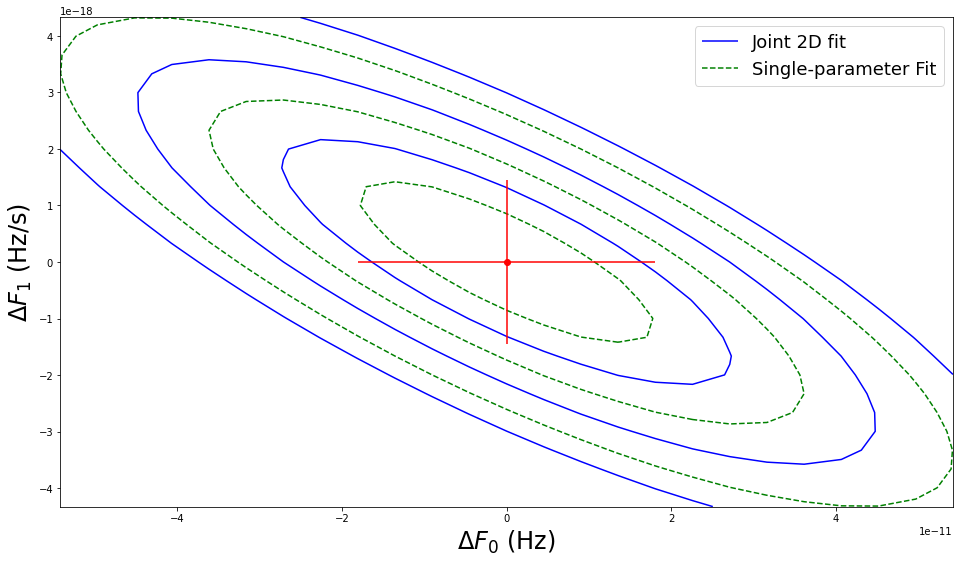

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))
# just plot the values offset from the best-fit values
twod = ax.contour(
    F0 - f.model.F0.quantity,
    F1 - f.model.F1.quantity,
    chi2grid - bestfit,
    levels=contour_levels,
    colors="b",
)
oned = ax.contour(
    F0 - f.model.F0.quantity,
    F1 - f.model.F1.quantity,
    chi2grid - bestfit,
    levels=contour_levels_1param,
    colors="g",
    linestyles="--",
)
ax.errorbar(
    0, 0, xerr=f.model.F0.uncertainty.value, yerr=f.model.F1.uncertainty.value, fmt="ro"
)
ax.set_xlabel("$\Delta F_0$ (Hz)", fontsize=24)
ax.set_ylabel("$\Delta F_1$ (Hz/s)", fontsize=24)
twod_artists, _ = twod.legend_elements()
oned_artists, _ = oned.legend_elements()
ax.legend(
    [twod_artists[0], oned_artists[0]],
    ["Joint 2D fit", "Single-parameter Fit"],
    fontsize=18,
)

It's pretty clear that $F0$ and $F1$ are highly (anti)correlated.  This can be improved by chosing **PEPOCH**.

We can look at the correlation matrix explicitly:

In [15]:
f.parameter_correlation_matrix


Parameter correlation matrix:
         RAJ   DECJ    DM     F0     F1   
  RAJ    1.000
 DECJ   -0.072  1.000
  DM    -0.005  0.065  1.000
  F0    -0.087  0.247  0.007  1.000
  F1     0.294 -0.344  0.058 -0.798  1.000


We can see that the $(F0,F1)$ is $-0.8$, which agrees (qualitatively) with what we see above.

It's also clear that the joint confidence region (solid blue contours) are significantly bigger than the single parameter region (green dashed contours).

## Changing PEPOCH

To have minimal covariance between $F0$ and $F1$, we want PEPOCH to be close to the mean time of the TOAs (ideally the weighted mean).  Is it close now?

In [16]:
print(f"PEPOCH: {f.model.PEPOCH}")
print(f"Mean TOA: {f.toas.get_mjds().mean()}")

PEPOCH: MJDParameter(   PEPOCH              53750.0000000000000000 (d) frozen=True)
Mean TOA: 53891.80222902908 d


So they differ by 141 days. Let's change that.

In [17]:
# keep a copy of our old fit for reference
old_f = copy.deepcopy(f)

In [18]:
f.model.change_pepoch(f.toas.get_mjds().mean())
f.fit_toas()
new_bestfit = f.resids.chi2
print(f"Old chi^2: {bestfit}, new chi^2: {new_bestfit}")
print(
    f"Old F0: {old_f.model.F0.quantity}, new F0: {f.model.F0.quantity}, difference {(f.model.F0.quantity - old_f.model.F0.quantity)/f.model.F0.uncertainty} sigma"
)
print(
    f"Old F1: {old_f.model.F1.quantity}, new F1: {f.model.F1.quantity}, difference {(f.model.F1.quantity - old_f.model.F1.quantity)/f.model.F1.uncertainty} sigma"
)

Old chi^2: 59.574705174097026, new chi^2: 59.57470447779082
Old F0: 61.4854765543725 Hz, new F0: 61.48547653989916 Hz, difference -1272.0252960848732 sigma
Old F1: -1.1813316958072389e-15 Hz / s, new F1: -1.181331692807776e-15 Hz / s, difference 2.0802819179073656e-06 sigma


We see that the overall fit quality ($\chi^2$) is the same. That's good.

$F1$ doesn't change.  That is expected.  But $F0$ does.  However, that's mostly just from changing epoch to redefine when $F0$ is evaluated.  We can check this by looking at what change we expect for $F0$:

In [19]:
print(
    f"Predicted new F0 - fitted new F0 = {(old_f.model.F0.quantity + (f.model.PEPOCH.quantity - old_f.model.PEPOCH.quantity)*f.model.F1.quantity - f.model.F0.quantity)/f.model.F0.uncertainty} sigma"
)

Predicted new F0 - fitted new F0 = -3.0492101325654805e-05 sigma


So the change is pretty close to what we expect.

In [20]:
# update the grids
new_F0 = np.linspace(
    f.model.F0.quantity - 3 * f.model.F0.uncertainty,
    f.model.F0.quantity + 3 * f.model.F0.uncertainty,
    len(F0),
)
new_F1 = np.linspace(
    f.model.F1.quantity - 3 * f.model.F1.uncertainty,
    f.model.F1.quantity + 3 * f.model.F1.uncertainty,
    len(F1),
)

In [21]:
new_chi2grid = pint.gridutils.grid_chisq(f, ("F0", "F1"), (new_F0, new_F1))[0]

  0%|                                                                                                                                                                                              | 0/675 [00:00<?, ?it/s]2022-11-02 10:32:45.339 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653988494 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:45.367 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653988209 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:45.375 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539867875 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:45.381 | DEBUG    | pint.gridutils:do

2022-11-02 10:32:45.537 | DEBUG    | pint.observatory.clock_file:__init__:797 - Global clock file tai2tt_bipm2021.clk saving kwargs={'bogus_last_correction': False, 'valid_beyond_ends': False}
2022-11-02 10:32:45.537 | DEBUG    | pint.observatory.clock_file:__init__:797 - Global clock file tai2tt_bipm2021.clk saving kwargs={'bogus_last_correction': False, 'valid_beyond_ends': False}
2022-11-02 10:32:45.538 | DEBUG    | pint.observatory.clock_file:read_tempo2_clock_file:460 - Loading TEMPO2-format observatory clock correction file /Users/kaplan/.astropy/cache/download/url/e00edeef4edde217d65207a9abeb6a8c/contents with bogus_last_correction=False
2022-11-02 10:32:45.538 | DEBUG    | pint.observatory.clock_file:read_tempo2_clock_file:460 - Loading TEMPO2-format observatory clock correction file /Users/kaplan/.astropy/cache/download/url/e00edeef4edde217d65207a9abeb6a8c/contents with bogus_last_correction=False
2022-11-02 10:32:45.543 | INFO     | pint.observatory:find_clock_file:938 - Usin

2022-11-02 10:32:45.818 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:45.854 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:45.865 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:45.880 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:45.886 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:45.896 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:45.904 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:45.

2022-11-02 10:32:47.426 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653990485 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:47.433 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539907694 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:47.443 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539893476 Hz,F1 = -1.1856572549263984e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:47.453 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989063 Hz,F1 = -1.1856572549263984e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-80

2022-11-02 10:32:47.549 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:47.551 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:47.551 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:47.551 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:47.551 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:47.552 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:47.552 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:47.552 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to T

2022-11-02 10:32:48.212 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991054 Hz,F1 = -1.1856572549263984e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:48.220 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539913385 Hz,F1 = -1.1856572549263984e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:48.251 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.97148923787434 for F0 = 61.48547653989632 Hz,F1 = -1.1856572549263984e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:48.257 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute p

2022-11-02 10:32:48.441 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:48.445 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:48.447 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:48.447 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:48.447 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:48.448 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:48.448 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:48.449 | DEBUG    | pint.toa:compute_TDBs:2170 -

  3%|####5                                                                                                                                                                                | 17/675 [00:05<02:17,  4.79it/s]2022-11-02 10:32:48.852 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:48.869 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539933295 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:48.871 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539865026 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:48.872 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:48.872 | DEBUG    

2022-11-02 10:32:49.151 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987641 Hz,F1 = -1.1853245193788121e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:49.156 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:49.157 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:49.157 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:49.158 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:49.158 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:49.159 | INFO     | pint.observatory.topo_obs:

2022-11-02 10:32:49.473 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=72.56675451304505 for F0 = 61.485476539865026 Hz,F1 = -1.1853245193788121e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:49.475 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=84.7360982296599 for F0 = 61.485476539933295 Hz,F1 = -1.1856572549263984e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
  4%|######7                                                                                                                                                                              | 25/675 [00:06<01:28,  7.36it/s]2022-11-02 10:32:49.479 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:49.508 | DEBUG   

2022-11-02 10:32:49.934 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989063 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:49.955 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539893476 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:49.964 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989632 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:49.981 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989916 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:49.988 | DEBUG

2022-11-02 10:32:50.136 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.47542833666228 for F0 = 61.48547653988494 Hz,F1 = -1.1853245193788121e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:50.138 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.29216984328018 for F0 = 61.485476539887784 Hz,F1 = -1.1853245193788121e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
  5%|########8                                                                                                                                                                            | 33/675 [00:07<01:01, 10.36it/s]2022-11-02 10:32:50.185 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539907694 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:

  5%|#########3                                                                                                                                                                           | 35/675 [00:07<01:22,  7.78it/s]2022-11-02 10:32:50.690 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539913385 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:50.698 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991623 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:50.703 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991908 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:50.716 | DEBUG    | pint.gridutils:do

2022-11-02 10:32:50.900 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539933295 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:50.918 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992761 Hz,F1 = -1.1853245193788121e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:50.926 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653993045 Hz,F1 = -1.1853245193788121e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:50.938 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539933295 Hz,F1 = -1.1853245193788121e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon A

  6%|###########5                                                                                                                                                                         | 43/675 [00:08<01:08,  9.19it/s]2022-11-02 10:32:51.323 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=72.94060627825003 for F0 = 61.48547653991623 Hz,F1 = -1.1853245193788121e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:51.337 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=74.25355327169017 for F0 = 61.48547653991908 Hz,F1 = -1.1853245193788121e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:51.368 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=77.28749650466258 for F0 = 61.48547653992476 Hz,F1 = -1.1853245193788121e-15 Hz / s on b'Darwi

2022-11-02 10:32:51.585 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:51.587 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:51.587 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:51.588 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:51.589 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:51.589 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:51.590 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:51.590 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:32:51.964 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:51.965 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:51.965 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:51.988 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:51.989 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:51.989 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:52.015 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=70.49163632645745 for F0 = 61.485476539867875 Hz,F1 = -1.1849917838312257e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEAS

2022-11-02 10:32:52.243 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:52.244 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989632 Hz,F1 = -1.1849917838312257e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:52.247 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:52.247 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:52.249 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:52.251 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:52.252 | INFO     | pint.observatory.topo_obs:

2022-11-02 10:32:52.419 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:52.425 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:52.441 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:52.452 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:52.456 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:52.468 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:52.473 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:52.477 | DEBUG    | pint.toa:compute_posvel

2022-11-02 10:32:52.891 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:52.892 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:52.893 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:52.894 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:52.894 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:52.895 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:52.895 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:52.895 | INFO     | pint.observatory:bipm_correction:224 - Applyin

2022-11-02 10:32:53.157 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:53.158 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:53.158 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:32:53.160 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653993045 Hz,F1 = -1.1849917838312257e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:53.209 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:53.209 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:53.210 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags fou

2022-11-02 10:32:53.640 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539933295 Hz,F1 = -1.1849917838312257e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:53.646 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539865026 Hz,F1 = -1.1846590482836394e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:53.654 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:53.654 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:53.654 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:53.655 | DEBUG    | pint.

2022-11-02 10:32:53.863 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:53.865 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:53.865 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:53.866 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:53.867 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:53.868 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:53.870 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:53.870 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:32:53.950 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:32:54.089 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:54.098 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:54.099 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:54.107 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:54.150 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:54.150 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:54.150 | INFO     | pint.solar

 11%|####################6                                                                                                                                                                | 77/675 [00:11<00:58, 10.16it/s]2022-11-02 10:32:54.385 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:54.386 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:54.386 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:54.386 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:54.388 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:54.388 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:32:54.399 | DEBUG    | pint.gridutils:doonefit:

2022-11-02 10:32:54.669 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:54.671 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:54.671 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:54.673 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:54.674 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:54.676 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:54.678 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:54.678 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:32:55.014 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539907694 Hz,F1 = -1.1846590482836394e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:55.018 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991054 Hz,F1 = -1.1846590482836394e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:55.052 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:55.053 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:55.053 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:5

2022-11-02 10:32:55.357 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:55.359 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:55.359 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:55.361 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:55.364 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:55.365 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:55.369 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:55.369 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:32:55.587 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.05372451853738 for F0 = 61.485476539907694 Hz,F1 = -1.1846590482836394e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:55.588 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.8871428297761 for F0 = 61.48547653991054 Hz,F1 = -1.1846590482836394e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 13%|########################4                                                                                                                                                            | 91/675 [00:12<00:51, 11.44it/s]2022-11-02 10:32:55.602 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:55.619 | INFO     

2022-11-02 10:32:56.032 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539865026 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:56.066 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539867875 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:56.079 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:56.084 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:56.088 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:56.089 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=72.58100471295593 fo

2022-11-02 10:32:56.434 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:56.437 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=77.5295973796085 for F0 = 61.48547653993045 Hz,F1 = -1.1846590482836394e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 15%|##########################5                                                                                                                                                          | 99/675 [00:13<00:53, 10.74it/s]2022-11-02 10:32:56.441 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=79.45116400217158 for F0 = 61.485476539933295 Hz,F1 = -1.1846590482836394e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:56.444 | INFO     

2022-11-02 10:32:56.904 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989063 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:56.914 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539887784 Hz,F1 = -1.1843263127360531e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:56.935 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.88273346738616 for F0 = 61.48547653987356 Hz,F1 = -1.1843263127360531e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:56.947 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.04819475704093 for F0 = 61.48547653987641 Hz,F1 = -1.1843263127360531e-15 Hz / s on b'Darwin

2022-11-02 10:32:57.138 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:57.143 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:57.144 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:57.145 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:57.146 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:57.146 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:57.148 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:57.148 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:32:57.376 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:57.395 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:57.399 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:57.415 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:57.415 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:57.469 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:57.491 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:32:57.492 | DEBUG    | pint.models.absolute_phase:get_

2022-11-02 10:32:57.975 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.8454928249581 for F0 = 61.485476539907694 Hz,F1 = -1.1843263127360531e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:57.985 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.18382758860352 for F0 = 61.48547653990485 Hz,F1 = -1.1843263127360531e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 17%|##############################6                                                                                                                                                     | 115/675 [00:14<00:47, 11.86it/s]2022-11-02 10:32:57.993 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539913385 Hz,F1 = -1.1843263127360531e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Ke

2022-11-02 10:32:58.188 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:58.283 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:58.290 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:58.303 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:58.309 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:58.310 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:58.323 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:32:58.333 | INFO     | pint

2022-11-02 10:32:58.818 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=74.28566692381195 for F0 = 61.48547653992761 Hz,F1 = -1.1843263127360531e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 18%|################################8                                                                                                                                                   | 123/675 [00:15<00:45, 12.01it/s]2022-11-02 10:32:58.836 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987356 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:58.853 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539865026 Hz,F1 = -1.1839935771884667e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8

2022-11-02 10:32:59.020 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:59.022 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:59.022 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:59.023 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:32:59.023 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:59.023 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:59.024 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:59.024 | DEBUG    | pint.toa:compute_TDBs:

 19%|#################################8                                                                                                                                                  | 127/675 [00:16<01:03,  8.67it/s]2022-11-02 10:32:59.531 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.22551617805128 for F0 = 61.48547653987072 Hz,F1 = -1.1839935771884667e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:59.572 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.34894912948178 for F0 = 61.48547653987641 Hz,F1 = -1.1839935771884667e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:32:59.590 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.21922269394582 for F0 = 61.48547653987356 Hz,F1 = -1.1839935771884667e-15 Hz / s on b'Darwi

2022-11-02 10:32:59.797 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:32:59.798 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:32:59.798 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:32:59.799 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:32:59.799 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:32:59.800 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:32:59.800 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:32:59.801 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:33:00.203 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:00.206 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:00.206 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:00.207 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:00.207 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:00.218 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:00.219 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:00.219 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:00.263 | INFO     | pint.solar_system_ephem

2022-11-02 10:33:00.515 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992761 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:00.516 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:00.527 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992476 Hz,F1 = -1.1839935771884667e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:00.542 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992192 Hz,F1 = -1.1839935771884667e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:00.546 | DEBUG    | pint.gridutils:doonefit:68 - Running f

2022-11-02 10:33:00.785 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:00.789 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:00.800 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:00.802 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:00.804 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:00.807 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:00.810 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:00.814 | DEBUG    | pint

2022-11-02 10:33:01.345 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:01.346 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:01.347 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:01.347 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:01.348 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=74.65726419411898 for F0 = 61.48547653993045 Hz,F1 = -1.1839935771884667e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:01.348 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:01.350 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of 

2022-11-02 10:33:01.765 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:01.765 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:01.784 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:01.785 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:01.785 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:01.786 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:01.787 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:01.789 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:01.794 | INFO     | pint.solar_system_ephem

2022-11-02 10:33:02.133 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:02.134 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:02.134 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:02.135 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:02.136 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:02.137 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:02.138 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:02.138 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:33:02.339 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:02.356 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:02.366 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:02.366 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:02.388 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:02.394 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:02.395 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:02.401 | DEBUG    | pint

 24%|############################################                                                                                                                                        | 165/675 [00:19<00:41, 12.26it/s]2022-11-02 10:33:02.890 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539907694 Hz,F1 = -1.1836608416408804e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:02.903 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991054 Hz,F1 = -1.1836608416408804e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:02.918 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539913385 Hz,F1 = -1.1836608416408804e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022

2022-11-02 10:33:03.179 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:03.196 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:03.209 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:03.209 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:03.210 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:03.217 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:03.229 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:03.240 | INFO    

2022-11-02 10:33:03.848 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987072 Hz,F1 = -1.183328106093294e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:03.864 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:03.866 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:03.866 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:03.866 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:03.867 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:03.867 | INFO     | pint.observatory.topo_obs:c

2022-11-02 10:33:04.091 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:04.097 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:04.121 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:04.127 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:04.127 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:04.129 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:04.142 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:04.146 | INFO     | pint

2022-11-02 10:33:04.777 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653988209 Hz,F1 = -1.183328106093294e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:04.783 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989063 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:04.792 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539893476 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:04.803 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989916 Hz,F1 = -1.183328106093294e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.

2022-11-02 10:33:05.046 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:05.074 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:05.081 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:05.082 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:05.095 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:05.103 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:05.117 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:05.122 | INFO     | pint

2022-11-02 10:33:05.685 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991054 Hz,F1 = -1.183328106093294e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:05.694 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539913385 Hz,F1 = -1.183328106093294e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:05.703 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991908 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:05.717 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991623 Hz,F1 = -1.183328106093294e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 2

2022-11-02 10:33:05.953 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:05.968 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:05.983 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:05.984 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:05.984 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:05.991 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:05.991 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:05.999 | DEBUG    | pint

2022-11-02 10:33:06.599 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:06.600 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:06.600 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:06.601 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:06.601 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:06.602 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:06.606 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:06.607 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:3

2022-11-02 10:33:07.237 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987925 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:07.244 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653988209 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:07.259 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653988494 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:07.271 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539887784 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 

2022-11-02 10:33:07.399 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989063 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:07.430 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539893476 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:07.438 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989632 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:07.441 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:07.443 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in

2022-11-02 10:33:07.871 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.10513717333949 for F0 = 61.48547653987925 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 31%|######################################################9                                                                                                                             | 206/675 [00:24<00:49,  9.40it/s]2022-11-02 10:33:07.874 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=61.396862357669676 for F0 = 61.485476539887784 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:07.884 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=62.399693641491005 for F0 = 61.48547653988209 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Da

2022-11-02 10:33:08.062 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:08.062 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:08.063 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:08.063 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:08.065 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:08.068 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.938105644049244 for F0 = 61.485476539893476 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:08.077 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=61.0234

2022-11-02 10:33:08.285 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:08.411 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:08.420 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:08.424 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:08.424 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:08.433 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:08.433 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:08.437 | INFO     | pint.solar_

2022-11-02 10:33:08.789 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.5438193573501 for F0 = 61.48547653991623 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:08.797 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.80543211526492 for F0 = 61.48547653992192 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:08.807 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.60661731873381 for F0 = 61.48547653991908 Hz,F1 = -1.1829953705457077e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:08.811 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.61703985

2022-11-02 10:33:09.158 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.161 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.166 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.171 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:09.173 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:09.176 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.179 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:09.185 | DEBUG    | pint

2022-11-02 10:33:09.490 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.57991783189722 for F0 = 61.485476539865026 Hz,F1 = -1.1826626349981214e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 33%|############################################################2                                                                                                                       | 226/675 [00:26<00:37, 11.83it/s]2022-11-02 10:33:09.498 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.7241588923258 for F0 = 61.48547653987356 Hz,F1 = -1.1826626349981214e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:09.507 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.1586479266076 for F0 = 61.485476539867875 Hz,F1 = -1.1826626349981214e-15 Hz / s on b'Darwi

2022-11-02 10:33:09.860 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.863 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.863 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.865 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.871 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.871 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.882 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:09.

2022-11-02 10:33:10.209 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.48803721556791 for F0 = 61.485476539893476 Hz,F1 = -1.1826626349981214e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:10.246 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.68514275817554 for F0 = 61.48547653989063 Hz,F1 = -1.1826626349981214e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:10.251 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.42695170216636 for F0 = 61.48547653989632 Hz,F1 = -1.1826626349981214e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:10.260 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=61.018265

2022-11-02 10:33:10.594 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:10.628 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:10.629 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:10.630 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:10.630 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:10.631 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:10.633 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:10.

2022-11-02 10:33:11.000 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.83493012751671 for F0 = 61.48547653991908 Hz,F1 = -1.1826626349981214e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:11.037 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539933295 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:11.048 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539865026 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:11.055 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539867875 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~

 36%|#################################################################6                                                                                                                  | 246/675 [00:28<00:41, 10.34it/s]2022-11-02 10:33:11.478 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.29710855856653 for F0 = 61.48547653992476 Hz,F1 = -1.1826626349981214e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:11.486 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.73222821571102 for F0 = 61.48547653992761 Hz,F1 = -1.1826626349981214e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:11.491 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=70.30336536983695 for F0 = 61.48547653993045 Hz,F1 = -1.1826626349981214e-15 Hz / s on b'Darwi

2022-11-02 10:33:11.744 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:11.744 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:11.746 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:11.751 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.14609650496463 for F0 = 61.485476539867875 Hz,F1 = -1.182329899450535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:11.761 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.6031025044066 for F0 = 61.485476539865026 Hz,F1 = -1.182329899450535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:11.768 | DEBUG    | pint.gridutils:doonefit:87 - Comput

2022-11-02 10:33:12.109 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:12.118 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:12.120 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:12.122 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:12.130 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:12.131 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:12.137 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:12.145 | DEBUG    | pint

2022-11-02 10:33:12.514 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.153867800288666 for F0 = 61.485476539893476 Hz,F1 = -1.182329899450535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:12.518 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:12.520 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:12.522 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:12.522 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:12.522 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:12.522 | DEBUG    | pint.toa:apply_cloc

2022-11-02 10:33:12.731 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:12.736 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:12.750 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:12.750 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:12.783 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:12.783 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:12.783 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:12.789 | DEBUG    | pint

2022-11-02 10:33:13.198 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:13.198 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:13.204 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992476 Hz,F1 = -1.182329899450535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:13.212 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992761 Hz,F1 = -1.182329899450535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:13.220 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:13.220 | DEBUG    | pint.toa:

2022-11-02 10:33:13.389 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539933295 Hz,F1 = -1.182329899450535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:13.394 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539867875 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:13.404 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539865026 Hz,F1 = -1.1819971639029487e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:13.409 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:13.430 | DEBUG    | pint.models.absolute_ph

 40%|########################################################################                                                                                                            | 270/675 [00:30<00:43,  9.31it/s]2022-11-02 10:33:13.770 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.30648686432197 for F0 = 61.48547653992192 Hz,F1 = -1.182329899450535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:13.781 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.5698498779702 for F0 = 61.48547653992476 Hz,F1 = -1.182329899450535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:13.785 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:13.785 | DEBUG    | p

2022-11-02 10:33:13.973 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:13.973 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:13.974 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:13.974 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:13.975 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:13.976 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:13.976 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:13.978 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:

2022-11-02 10:33:14.178 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:14.182 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:14.193 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:14.205 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:14.205 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:14.294 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:14.303 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:14.337 | INFO     | pint.solar_

2022-11-02 10:33:14.678 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653990201 Hz,F1 = -1.1819971639029487e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:14.692 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:14.694 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:14.694 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:14.694 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:14.695 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:14.695 | INFO     | pint.observatory.topo_obs:

2022-11-02 10:33:14.908 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:14.909 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:14.909 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:14.910 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:14.910 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:14.910 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:14.911 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:14.911 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:33:15.325 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991623 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:15.341 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991908 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:15.345 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992192 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:15.346 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:15.347 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:

2022-11-02 10:33:15.581 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.6329964580346 for F0 = 61.485476539907694 Hz,F1 = -1.1819971639029487e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:15.595 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=61.180530940850446 for F0 = 61.48547653991054 Hz,F1 = -1.1819971639029487e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:15.640 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992761 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:15.645 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539933295 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version

2022-11-02 10:33:15.937 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:15.943 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:15.945 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:15.950 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:15.951 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:15.957 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:15.996 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:15.996 | INFO     | pint

 44%|###############################################################################7                                                                                                    | 299/675 [00:33<00:32, 11.59it/s]2022-11-02 10:33:16.344 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.99716309878185 for F0 = 61.485476539865026 Hz,F1 = -1.1816644283553624e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:16.358 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987641 Hz,F1 = -1.1816644283553624e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:16.368 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:16.369 | DEBUG    | pint.toa:__init__

2022-11-02 10:33:16.513 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:16.513 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:16.515 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:16.524 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:16.528 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:16.551 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:16.555 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:16.591 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from 

2022-11-02 10:33:17.014 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:17.014 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:17.015 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:17.016 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:17.016 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:17.020 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:17.050 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:17.052 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:3

2022-11-02 10:33:17.263 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:17.266 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:17.267 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:17.267 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:17.268 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:17.268 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:17.268 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:17.269 | DEBUG    | pint.toa:compute_TDBs:

2022-11-02 10:33:17.658 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991623 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:17.672 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539913385 Hz,F1 = -1.1816644283553624e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:17.677 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:17.678 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:17.678 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:17.703 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991623 Hz,F1 = -1.1816644

2022-11-02 10:33:17.913 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992192 Hz,F1 = -1.1816644283553624e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:17.920 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:17.921 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:17.921 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:17.923 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:17.924 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:17.924 | INFO     | pint.observatory.topo_obs:

2022-11-02 10:33:18.142 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:18.175 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:18.183 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:18.183 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:18.184 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:18.185 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:18.191 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:18.197 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set 

 47%|#####################################################################################3                                                                                              | 320/675 [00:35<00:35,  9.88it/s]2022-11-02 10:33:18.506 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.27112981438084 for F0 = 61.48547653992192 Hz,F1 = -1.1816644283553624e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:18.522 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.46302083199733 for F0 = 61.48547653992476 Hz,F1 = -1.1816644283553624e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:18.533 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987072 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20

2022-11-02 10:33:18.843 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:18.849 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:18.866 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:18.866 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:18.866 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:18.866 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:18.871 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:18.878 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11

2022-11-02 10:33:19.286 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=62.90715922504715 for F0 = 61.48547653987925 Hz,F1 = -1.181331692807776e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:19.289 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:19.297 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:19.297 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=62.0230376066593 for F0 = 61.48547653988209 Hz,F1 = -1.181331692807776e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:19.298 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.

2022-11-02 10:33:19.514 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:19.518 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:19.537 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:19.537 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:19.538 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:19.538 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:19.609 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:19.609 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.66285228511938 for F0 = 61.485476539887784 Hz,F1 = -1.18

2022-11-02 10:33:19.967 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:19.968 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:19.990 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=59.846741518634296 for F0 = 61.485476539893476 Hz,F1 = -1.181331692807776e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:19.996 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:19.997 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
 50%|#########################################################################################6                                                       

2022-11-02 10:33:20.211 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:20.211 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:20.213 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:20.213 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:20.213 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:20.214 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:20.214 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:20.215 | INFO     | pint.observatory.topo_ob

2022-11-02 10:33:20.632 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:20.656 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:20.656 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:20.664 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:20.664 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:20.673 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:20.675 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:20.676 | DEBUG    | pint.toa:compute_posvels:2355 - Adding colu

2022-11-02 10:33:21.024 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:21.024 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:21.024 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:21.026 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:21.028 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=69.36803745357348 for F0 = 61.485476539933295 Hz,F1 = -1.181331692807776e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 52%|#############################################################################################3                                                                                      | 350/675 [00:38<00:25, 12.54it/s]2022-11-02 10:33:21.063 | DE

 52%|#############################################################################################8                                                                                      | 352/675 [00:38<00:34,  9.44it/s]2022-11-02 10:33:21.504 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.79093351527277 for F0 = 61.48547653987072 Hz,F1 = -1.1809989572601897e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:21.527 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.46302113056659 for F0 = 61.48547653987356 Hz,F1 = -1.1809989572601897e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:21.551 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.215255751122555 for F0 = 61.48547653987925 Hz,F1 = -1.1809989572601897e-15 Hz / s on b'Darw

2022-11-02 10:33:21.773 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:21.774 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:21.774 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:21.776 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:21.777 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:21.777 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:21.778 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:21.778 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:33:22.153 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:22.153 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:22.154 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:22.154 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:22.155 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:22.155 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:22.186 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:22.187 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:22.

2022-11-02 10:33:22.486 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992192 Hz,F1 = -1.1809989572601897e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:22.488 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:22.489 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:22.490 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:22.490 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:22.491 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:22.491 | INFO     | pint.observatory.topo_obs:

2022-11-02 10:33:22.633 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:22.634 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:22.634 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:22.635 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:22.636 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:22.636 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:22.637 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:22.637 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:33:23.199 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987356 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:23.209 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539865026 Hz,F1 = -1.1806662217126032e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:23.221 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987641 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:23.231 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.07622482962651 for F0 = 61.48547653992761 Hz,F1 = -1.1809989572601897e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:

2022-11-02 10:33:23.403 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:23.404 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:23.404 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:23.405 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:23.405 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:23.405 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:23.406 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:23.407 | DEBUG    | pint.toa:_

2022-11-02 10:33:23.837 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.32213384150003 for F0 = 61.48547653987072 Hz,F1 = -1.1806662217126032e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:23.854 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:23.854 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:23.855 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:23.855 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539887784 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:23.863 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653

2022-11-02 10:33:24.119 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:24.119 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:24.120 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:24.121 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:24.121 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:24.122 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:24.122 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:24.124 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:

2022-11-02 10:33:24.555 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:24.556 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:24.566 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:24.594 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:24.595 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:24.598 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.221478462630664 for F0 = 61.485476539893476 Hz,F1 = -1.1806662217126032e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:24.607 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991054 Hz on b'Darwin

2022-11-02 10:33:24.948 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:24.949 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:24.949 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:24.951 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:24.969 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992761 Hz,F1 = -1.1806662217126032e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:24.979 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:24.981 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
202

 58%|########################################################################################################5                                                                           | 392/675 [00:42<00:32,  8.61it/s]2022-11-02 10:33:25.351 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=61.1493762951886 for F0 = 61.485476539913385 Hz,F1 = -1.1806662217126032e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:25.389 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:25.390 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:25.390 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:25.391 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris t

 59%|##########################################################################################################4                                                                         | 399/675 [00:42<00:19, 14.27it/s]2022-11-02 10:33:25.616 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987072 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:25.621 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987356 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:25.645 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987641 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:25.650 | DEBUG    | pint.gridutils:doo

2022-11-02 10:33:25.771 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:25.772 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:25.772 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:25.772 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:25.774 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:25.794 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:25.798 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:25.798 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  

 60%|###########################################################################################################2                                                                        | 402/675 [00:43<00:30,  8.88it/s]2022-11-02 10:33:26.284 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.56984820807091 for F0 = 61.48547653987356 Hz,F1 = -1.180333486165017e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:26.296 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.17914053127997 for F0 = 61.48547653987925 Hz,F1 = -1.180333486165017e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:26.303 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.96923141529862 for F0 = 61.48547653987072 Hz,F1 = -1.180333486165017e-15 Hz / s on b'Darwin p

2022-11-02 10:33:26.576 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:26.577 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:26.577 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:26.577 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:26.578 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:26.578 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:26.579 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:26.579 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

 61%|#############################################################################################################3                                                                      | 410/675 [00:44<00:28,  9.27it/s]2022-11-02 10:33:27.109 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.2714577237663 for F0 = 61.48547653989632 Hz,F1 = -1.180333486165017e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:27.148 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=60.15386664463757 for F0 = 61.48547653990485 Hz,F1 = -1.180333486165017e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:27.217 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:27.218 | INFO     | p

2022-11-02 10:33:27.354 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:27.356 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:27.356 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:27.356 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:27.357 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:27.357 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:27.357 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:27.358 | DEBUG    | pint.toa:c

2022-11-02 10:33:27.732 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:27.754 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:27.763 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:27.772 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:27.778 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:27.778 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:27.778 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:27.779 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with T

2022-11-02 10:33:28.085 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:28.086 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:28.087 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:28.087 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:28.088 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:28.088 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:28.089 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:28.090 | DEBUG    | pint.toa:compute_TDBs:2170 -

2022-11-02 10:33:28.389 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653988494 Hz,F1 = -1.1800007506174307e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:28.420 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:28.421 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:28.421 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:28.421 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:28.422 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:28.422 | INFO     | pint.observatory.topo_obs:

2022-11-02 10:33:28.826 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:28.826 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:28.827 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:28.827 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:28.828 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:28.828 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:28.829 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:28.830 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:

2022-11-02 10:33:29.157 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539907694 Hz,F1 = -1.1800007506174307e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:29.190 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:29.191 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:29.192 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:29.192 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:29.192 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:29.193 | INFO     | pint.observatory.topo_obs

2022-11-02 10:33:29.544 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991908 Hz,F1 = -1.1800007506174307e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:29.559 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992192 Hz,F1 = -1.1800007506174307e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:29.568 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:29.569 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:29.569 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:29.570 | INFO     | pint.observato

2022-11-02 10:33:29.749 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:29.786 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653993045 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:29.789 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:29.793 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:29.815 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:29.819 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:29.821 | DEBUG    | pint.gridutils:doonefit:68 - Running for F

2022-11-02 10:33:30.216 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:30.217 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:30.217 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:30.219 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:30.220 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:30.220 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:30.221 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:30.221 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:33:30.367 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987925 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:30.385 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987641 Hz,F1 = -1.1796680150698442e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:30.394 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.1586472121563 for F0 = 61.48547653993045 Hz,F1 = -1.1800007506174307e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 67%|#######################################################################################################################7                                                     

2022-11-02 10:33:30.791 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:30.792 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:30.793 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:30.796 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:30.797 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:30.797 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:30.805 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=72.96088290297614 for F0 = 61.485476539865026 Hz,F1 = -1.1796680150698442e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEAS

2022-11-02 10:33:31.067 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653990201 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:31.076 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.54381870416016 for F0 = 61.48547653988209 Hz,F1 = -1.1796680150698442e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 68%|#########################################################################################################################8                                                          | 457/675 [00:48<00:16, 13.47it/s]2022-11-02 10:33:31.086 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:31.088 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found i

2022-11-02 10:33:31.313 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:31.317 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:31.328 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:31.333 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:31.361 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:31.367 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:31.371 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:31.372 | DEBUG    | pint

2022-11-02 10:33:31.726 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:31.729 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:31.729 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:31.730 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:31.730 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:31.731 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:31.732 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:31.732 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:33:31.951 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:31.978 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:32.006 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:32.011 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:32.085 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:32.093 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:32.095 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:32.096 | DEBUG    | pint

2022-11-02 10:33:32.438 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.10513563362472 for F0 = 61.48547653991908 Hz,F1 = -1.1796680150698442e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 70%|#############################################################################################################################3                                                      | 470/675 [00:49<00:19, 10.31it/s]2022-11-02 10:33:32.454 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.9240772929373 for F0 = 61.48547653992476 Hz,F1 = -1.1796680150698442e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:32.471 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.946597938207034 for F0 = 61.48547653992192 Hz,F1 = -1.1796680150698442e-15 Hz / s on b'Darwi

2022-11-02 10:33:32.641 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:32.642 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:32.642 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:32.642 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:32.643 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:32.643 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:32.644 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:32.644 | DEBUG    | pint.toa:compute_TDBs:

2022-11-02 10:33:33.048 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539887784 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:33.051 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:33.051 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:33.052 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:33.064 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:33.065 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:33.065 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:33.071 | DEBUG    | 

2022-11-02 10:33:33.332 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:33.343 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:33.344 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:33.344 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:33.345 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:33.345 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:33.345 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:33.346 | DEBUG    | pint.toa:compute_TDBs:2170 -

2022-11-02 10:33:33.744 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:33.749 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:33.749 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:33.755 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:33.756 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:33.756 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:33.765 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:33.766 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:33.

2022-11-02 10:33:34.025 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:34.026 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:34.026 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:34.027 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:34.027 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:34.028 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:34.029 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:34.029 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

 73%|###################################################################################################################################2                                                | 492/675 [00:51<00:16, 11.34it/s]2022-11-02 10:33:34.387 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653993045 Hz,F1 = -1.179335279522258e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:34.427 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:34.428 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:34.429 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:34.429 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction

2022-11-02 10:33:34.688 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987356 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:34.700 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539867875 Hz,F1 = -1.1790025439746717e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:34.702 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987641 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:34.724 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:34.726 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in

2022-11-02 10:33:34.947 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:34.948 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.31765835146489 for F0 = 61.48547653992761 Hz,F1 = -1.179335279522258e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 74%|####################################################################################################################################7                                               | 498/675 [00:51<00:16, 10.94it/s]2022-11-02 10:33:34.959 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.53144209113756 for F0 = 61.48547653993045 Hz,F1 = -1.179335279522258e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:34.972 | DEBUG    | 

2022-11-02 10:33:35.302 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:35.304 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:35.304 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=73.39494100951983 for F0 = 61.485476539867875 Hz,F1 = -1.1790025439746717e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:35.318 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=75.20930176671774 for F0 = 61.485476539865026 Hz,F1 = -1.1790025439746717e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 74%|#####################################################################################################################################8                                 

2022-11-02 10:33:35.628 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:35.649 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:35.650 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:35.651 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:35.671 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:35.672 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:35.688 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:35.690 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download


2022-11-02 10:33:35.950 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:35.950 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:35.969 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:35.970 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:35.971 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:35.971 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:35.972 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:35.973 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:35.973 | DEBUG    | pint.toa:compute_posvel

2022-11-02 10:33:36.253 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:36.316 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:36.317 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:36.318 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:36.331 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:36.332 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:36.332 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:36.379 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10

2022-11-02 10:33:36.641 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:36.642 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:36.643 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:36.652 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:36.653 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:36.653 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:36.663 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:36.663 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download


2022-11-02 10:33:36.938 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:36.938 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:36.940 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:36.966 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:36.971 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:36.989 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:36.989 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:36.990 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:36.990 | DEBUG    | pint.models.absolute

2022-11-02 10:33:37.349 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:37.350 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:37.351 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:37.356 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:37.356 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:37.357 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:37.371 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:37.372 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:37.

2022-11-02 10:33:37.639 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:37.639 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:37.640 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:37.648 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:37.651 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:37.651 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:37.652 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:37.652 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~2

2022-11-02 10:33:37.920 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:37.921 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:37.921 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:37.922 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:37.922 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:37.924 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:38.083 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:38.091 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de

2022-11-02 10:33:38.421 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.28342169371764 for F0 = 61.48547653989916 Hz,F1 = -1.1786698084270852e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
 80%|###############################################################################################################################################4                                    | 538/675 [00:55<00:10, 12.70it/s]2022-11-02 10:33:38.424 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=63.065547677641106 for F0 = 61.48547653990201 Hz,F1 = -1.1786698084270852e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:38.440 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=62.98369249747255 for F0 = 61.48547653990485 Hz,F1 = -1.1786698084270852e-15 Hz / s on b'Darw

2022-11-02 10:33:38.840 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:38.841 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:38.841 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:38.846 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:38.847 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:38.848 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:38.849 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:38.851 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:38.

2022-11-02 10:33:39.134 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:39.135 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:39.135 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:39.135 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:39.136 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:39.136 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:39.138 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:39.141 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the singl

2022-11-02 10:33:39.335 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:39.343 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:39.347 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:39.354 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:39.358 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:39.369 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:39.373 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:39.377 | INFO     | pint.solar_

2022-11-02 10:33:39.851 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:39.853 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:39.853 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:39.852 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=72.6718696030385 for F0 = 61.48547653987356 Hz,F1 = -1.178337072879499e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:39.854 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:39.854 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
 82%|###################################

2022-11-02 10:33:40.076 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:40.080 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:40.081 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:40.085 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:40.119 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:40.125 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:40.129 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:40.135 | DEBUG    | pint

 83%|#####################################################################################################################################################8                              | 562/675 [00:57<00:08, 13.02it/s]2022-11-02 10:33:40.561 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.01494184510778 for F0 = 61.48547653990201 Hz,F1 = -1.178337072879499e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:40.575 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653990485 Hz,F1 = -1.178337072879499e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:40.588 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539907694 Hz,F1 = -1.178337072879499e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug

2022-11-02 10:33:40.702 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992192 Hz,F1 = -1.178337072879499e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:40.703 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992476 Hz,F1 = -1.178337072879499e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:40.728 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:40.729 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:40.729 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:40.730 | INFO     | pint.observatory

2022-11-02 10:33:41.240 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=64.78717114225334 for F0 = 61.48547653991623 Hz,F1 = -1.178337072879499e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:41.294 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:41.295 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992761 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:41.301 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:41.302 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:41.311 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.4854765399

2022-11-02 10:33:41.496 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987641 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:41.499 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:41.500 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:41.500 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:41.501 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:41.502 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:41.502 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying obs

2022-11-02 10:33:41.886 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:41.886 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:41.908 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:41.908 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:41.910 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:41.910 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:41.915 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:41.917 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:41.

2022-11-02 10:33:42.274 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539893476 Hz,F1 = -1.1780043373319125e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:42.289 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989916 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:42.296 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:42.296 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989632 Hz,F1 = -1.1780043373319125e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:42.299 | DEBUG    | pint.toa:__init__:1

2022-11-02 10:33:42.523 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:42.527 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:42.528 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:42.532 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:42.538 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:42.544 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:42.544 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:42.549 | DEBUG    | pint

 87%|############################################################################################################################################################7                       | 588/675 [01:00<00:07, 12.22it/s]2022-11-02 10:33:43.059 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:43.060 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991908 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:43.061 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:43.061 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:43.062 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:3

2022-11-02 10:33:43.193 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:43.194 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:43.194 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:43.195 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:43.195 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:43.196 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:43.196 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:43.196 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

 88%|##############################################################################################################################################################1                     | 593/675 [01:00<00:08, 10.23it/s]2022-11-02 10:33:43.736 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=65.67378419811013 for F0 = 61.48547653991623 Hz,F1 = -1.1780043373319125e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:43.747 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.20055083176442 for F0 = 61.48547653991908 Hz,F1 = -1.1780043373319125e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:43.762 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992476 Hz,F1 = -1.1780043373319125e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Ker

2022-11-02 10:33:43.936 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:43.937 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:43.937 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:43.937 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:43.937 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:43.938 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:43.938 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:43.938 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02

2022-11-02 10:33:44.405 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:44.405 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:44.409 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:44.413 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:44.426 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:44.426 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:44.427 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:44.427 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa


2022-11-02 10:33:44.825 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:44.826 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:44.826 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:44.827 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:44.827 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:44.828 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:44.828 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:44.828 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

2022-11-02 10:33:45.461 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989916 Hz,F1 = -1.1776716017843262e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:45.472 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539913385 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:45.488 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653990201 Hz,F1 = -1.1776716017843262e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:45.497 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653990485 Hz,F1 = -1.1776716017843262e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Au

2022-11-02 10:33:45.604 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:45.605 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:45.606 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:45.605 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991908 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:45.606 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:45.607 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:45.607 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying obs

 91%|###################################################################################################################################################################4                | 613/675 [01:03<00:08,  7.70it/s]2022-11-02 10:33:46.153 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.26141921651866 for F0 = 61.48547653990201 Hz,F1 = -1.1776716017843262e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:46.153 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=66.07235740412115 for F0 = 61.48547653990485 Hz,F1 = -1.1776716017843262e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:46.196 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653992192 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20

 92%|####################################################################################################################################################################8               | 618/675 [01:03<00:05,  9.98it/s]2022-11-02 10:33:46.404 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=67.16732623462204 for F0 = 61.48547653991908 Hz,F1 = -1.1776716017843262e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:46.456 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539865026 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:46.461 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539867875 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x8

 92%|#####################################################################################################################################################################6              | 621/675 [01:03<00:06,  8.54it/s]2022-11-02 10:33:46.920 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=71.66275651318179 for F0 = 61.485476539933295 Hz,F1 = -1.1776716017843262e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:46.925 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=70.49163356139023 for F0 = 61.48547653993045 Hz,F1 = -1.1776716017843262e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:46.967 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653987356 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:2

2022-11-02 10:33:47.142 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:47.142 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:47.145 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:33:47.187 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539887784 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:47.196 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989063 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:47.206 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.485476539893476 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; ro

2022-11-02 10:33:47.563 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:47.565 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:47.566 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:47.587 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:47.588 | DEBUG    | pint.toa:compute_posvels:2355 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-11-02 10:33:47.590 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:110 - Done with TZR_toa
2022-11-02 10:33:47.658 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=74.25354928521037 for F0 = 61.48547653987925 Hz,F1 = -1.17733886623674e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_A

2022-11-02 10:33:47.878 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
 94%|#########################################################################################################################################################################           | 634/675 [01:04<00:03, 11.53it/s]2022-11-02 10:33:47.878 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=70.72276954374874 for F0 = 61.485476539887784 Hz,F1 = -1.17733886623674e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:47.879 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:47.879 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:47.879 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=69.04

2022-11-02 10:33:48.100 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:48.104 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:48.117 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:48.117 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:48.122 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:48.122 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:48.225 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:48.234 | DEBUG    | pint

2022-11-02 10:33:48.631 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653993045 Hz,F1 = -1.17733886623674e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:48.644 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:48.647 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:48.648 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:48.648 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653991908 Hz,F1 = -1.17733886623674e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:48.649 | INFO     | pint.observatory:g

2022-11-02 10:33:48.869 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:48.876 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:48.877 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:48.882 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:48.900 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:48.900 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:48.907 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:48.907 | DEBUG    | pint

2022-11-02 10:33:49.479 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653988494 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:49.493 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653988209 Hz,F1 = -1.1770061306891535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:49.496 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:49.499 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:49.499 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:49.500 | INFO     | pint.observatory:gps_correction:217 - Applying GPS

2022-11-02 10:33:49.609 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:97 - Creating and dealing with the single TZR_toa for absolute phase
2022-11-02 10:33:49.610 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:49.610 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:49.611 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:49.611 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:49.612 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:49.612 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:49.612 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculati

 97%|##############################################################################################################################################################################9     | 656/675 [01:07<00:01, 10.58it/s]2022-11-02 10:33:50.196 | DEBUG    | pint.gridutils:doonefit:68 - Running for F0 = 61.48547653989632 Hz on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:50.211 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=73.39107040984159 for F0 = 61.48547653988494 Hz,F1 = -1.1770061306891535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:50.222 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=71.37380309611066 for F0 = 61.48547653989063 Hz,F1 = -1.1770061306891535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20

2022-11-02 10:33:50.397 | DEBUG    | pint.toa:__init__:1315 - No pulse number flags found in the TOAs
2022-11-02 10:33:50.397 | DEBUG    | pint.toa:apply_clock_corrections:2120 - Applying clock corrections (include_gps = True, include_bipm = True)
2022-11-02 10:33:50.398 | INFO     | pint.observatory:gps_correction:217 - Applying GPS to UTC clock correction (~few nanoseconds)
2022-11-02 10:33:50.399 | INFO     | pint.observatory:bipm_correction:224 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2022-11-02 10:33:50.399 | INFO     | pint.observatory.topo_obs:clock_corrections:355 - Applying observatory clock corrections for observatory='gbt'.
2022-11-02 10:33:50.400 | DEBUG    | pint.toa:compute_TDBs:2170 - Computing TDB columns.
2022-11-02 10:33:50.400 | DEBUG    | pint.toa:compute_TDBs:2195 - Using EPHEM = DE421 for TDB calculation.
2022-11-02 10:33:50.401 | DEBUG    | pint.toa:compute_posvels:2286 - Computing PosVels of observatories and Earth, using DE421
2022-11-02 10:

 98%|################################################################################################################################################################################2   | 661/675 [01:07<00:01,  9.11it/s]2022-11-02 10:33:50.911 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=69.90060780382319 for F0 = 61.48547653989632 Hz,F1 = -1.1770061306891535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:50.928 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=69.3680372139484 for F0 = 61.48547653989916 Hz,F1 = -1.1770061306891535e-15 Hz / s on b'Darwin plock 21.6.0 Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101 x86_64\n'
2022-11-02 10:33:50.941 | DEBUG    | pint.gridutils:doonefit:87 - Computed chi^2=68.97148698494895 for F0 = 61.48547653990201 Hz,F1 = -1.1770061306891535e-15 Hz / s on b'Darwin

2022-11-02 10:33:51.328 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:51.348 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:51.350 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:51.358 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:53 - Set solar system ephemeris to de421 from download
2022-11-02 10:33:51.362 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:51.362 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:51.362 | DEBUG    | pint.toa:compute_posvels:2341 - SSB obs pos [-1.43853911e+11  3.19743359e+10  1.38482179e+10] m
2022-11-02 10:33:51.368 | DEBUG    | pint

Plot the new and old contours

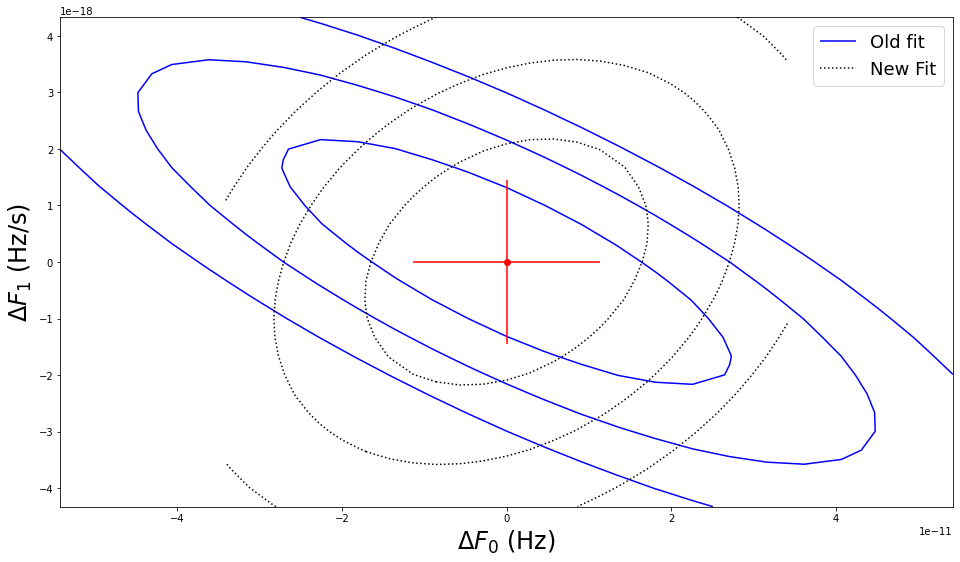

In [22]:
fig, ax = plt.subplots(figsize=(16, 9))
# just plot the values offset from the best-fit values
old = ax.contour(
    F0 - old_f.model.F0.quantity,
    F1 - old_f.model.F1.quantity,
    chi2grid - bestfit,
    levels=contour_levels,
    colors="b",
)
new = ax.contour(
    new_F0 - f.model.F0.quantity,
    new_F1 - f.model.F1.quantity,
    new_chi2grid - bestfit,
    levels=contour_levels,
    colors="k",
    linestyles=":",
)
ax.errorbar(
    0, 0, xerr=f.model.F0.uncertainty.value, yerr=f.model.F1.uncertainty.value, fmt="ro"
)
ax.set_xlabel("$\Delta F_0$ (Hz)", fontsize=24)
ax.set_ylabel("$\Delta F_1$ (Hz/s)", fontsize=24)
old_artists, _ = old.legend_elements()
new_artists, _ = new.legend_elements()
ax.legend([old_artists[0], new_artists[0]], ["Old fit", "New Fit"], fontsize=18)

The new contours (the black) look a lot more "orthogonal" than the old ones (the blue).  This is because they are less correlated.  We can check this more quantitatively by looking at the matrix:

In [23]:
f.parameter_correlation_matrix


Parameter correlation matrix:
         RAJ   DECJ    DM     F0     F1   
  RAJ    1.000
 DECJ   -0.072  1.000
  DM    -0.005  0.065  1.000
  F0     0.318 -0.141  0.100  1.000
  F1     0.294 -0.344  0.058  0.285  1.000


And we see that now the $(F0,F1)$ element is smaller, $0.29$.